In [1]:
## Analise Exploratoria

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinal.csv'
df_final = pd.read_csv(path_final, sep=';', encoding='utf-8')
df_final.head(1)

RowId  Id_do_imovel                            Url_da_Pagina_do_imovel  \
0      0      30365582  https://www.idealista.pt/arrendar-casas/aveiro...   

       Url_do_Imovel                                     Nome_do_imovel  \
0  /imovel/30365582/  Apartamento T0 na rua Manuel Lopes Conde, 1, O...   

   Preco Tipo_de_Imovel Valor_Area_util_do_imovel Numero_Andar_do_imovel  \
0  400,0             T0                      50,0                    0,0   

  Indicador_de_Elevador  ... Percentual_Crimes Quantidade_Bancos  \
0          sem elevador  ...              29,0                39   

  Latitude_Municipio  Longitude_Municipio Endereco_Municipio  \
0          40,640496           -8,6537841   Aveiro, Portugal   

  Distancia_dirigindo_de_Lisboa_Portugal  \
0                                  218,6   

  Distancia_dirigindo_de_Porto_Portugal Clima_Ranking Ranking_Geral  \
0                                  56,6          18,0          31,0   

  Ranking_Regional  
0              4,0  

[1 rows x 86 columns]

In [4]:
df_final.describe()

RowId  Id_do_imovel  Quantidade_de_Quartos  Id_do_proprietario  \
count  7278.000000  7.278000e+03            7278.000000                 0.0   
mean   3638.500000  3.104523e+07               2.019923                 NaN   
std    2101.121962  1.563265e+06               1.128059                 NaN   
min       0.000000  1.954200e+04               0.000000                 NaN   
25%    1819.250000  3.096468e+07               1.000000                 NaN   
50%    3638.500000  3.136501e+07               2.000000                 NaN   
75%    5457.750000  3.150491e+07               3.000000                 NaN   
max    7277.000000  3.162896e+07              20.000000                 NaN   

       Numero_Faixa_Etaria_0-14  Numero_Faixa_Etaria_15-64  \
count               7278.000000                7278.000000   
mean               50109.199505              176255.140286   
std                33420.272836              100569.912428   
min                 2705.000000               13313.000000   
25%                17461.000000               82438.000000   
50%                28508.000000              126342.000000   
75%                85452.000000              280124.000000   
max                85452.000000              280124.000000   

       Numero_Faixa_Etaria_>65  \
count              7278.000000   
mean              87515.967024   
std               54826.347908   
min                6028.000000   
25%               26222.000000   
50%               61897.000000   
75%              143990.000000   
max              143990.000000   

       Quantidade_Hospitais_(Particulares_e_Publicos)  Quantidade_Farmacias  \
count                                     7278.000000           7278.000000   
mean                                        21.251168            152.552762   
std                                         12.595955            100.966211   
min                                          1.000000              9.000000   
25%                                          4.000000             33.000000   
50%                                         20.000000            109.000000   
75%                                         33.000000            256.000000   
max                                         33.000000            256.000000   

       Quantidade_Construcoes_Novas  \
count                   7278.000000   
mean                      41.868233   
std                       47.487468   
min                        5.000000   
25%                       10.000000   
50%                       10.000000   
75%                       69.000000   
max                      181.000000   

       Quantidade_Escolas_Pre-Escolar_(4-6_anos)  \
count                                7278.000000   
mean                                  178.007145   
std                                   102.692473   
min                                    17.000000   
25%                                    79.000000   
50%                                   133.000000   
75%                                   283.000000   
max                                   283.000000   

       Quantidade_Escolas_Ciclo_1_(6-10_anos)  \
count                             7278.000000   
mean                               117.864935   
std                                 68.560908   
min                                 10.000000   
25%                                 67.000000   
50%                                 81.000000   
75%                                189.000000   
max                                189.000000   

       Quantidade_Escolas_Ciclo_2_(10-12_anos)  \
count                              7278.000000   
mean                                 52.966200   
std                                  34.361615   
min                                   2.000000   
25%                                  14.000000   
50%                                  39.000000   
75%                                  88.000000   
max                                  88.000000   

       Qu

In [6]:
#correcao de registros vazios
df_final['Tipo_de_Construcao'].fillna(df_final['Tipo_de_Construcao'].mode()[0], inplace=True)

In [49]:
# Separando variaveis

int_vars = ['Valor_Area_util_do_imovel','Area_construida','Numero_Andar_do_imovel','Tipo_de_Construcao',
            'Numero_de_Banheiros','Numero_de_Quartos','Numero_de_fotos_do_anuncio','Numero_de_videos_do_anuncio',
           'Tipo_de_Operacao','Tipo_de_proprietario','Numero_Faixa_Etaria_0-14', 'Numero_Faixa_Etaria_15-64',
           'Numero_Faixa_Etaria_>65','Quantidade_Hospitais_(Particulares_e_Publicos)',
            'Quantidade_Farmacias', 'Quantidade_Construcoes_Novas','Quantidade_Escolas_Pre-Escolar_(4-6_anos)',
            'Quantidade_Escolas_Ciclo_2_(10-12_anos)',
            'Quantidade_Escolas_Ciclo_3_(13-15_anos)',
            'Quantidade_Shows_Exibicoes_Teatro', 'Quantidade_Cinemas','Clima_Ranking','Ranking_Regional',
            'Tipo_de_Origem_do_anuncio','ad_typology']

bin_vars =['Possui_Jardim','Possui_Elevador','Possui_Estacionamento','Possui_Piscina','Possui_Terraco',
          'Indicador_Imovel_em_boas_condicoes','Indicador_Anuncio_possui_planta_baixa',
           'Indicador_Precisa_de_reforma','Indicador_Construcao_recente','E_Recomendado','Indicador_imovel_esta_em_leilao',
           'Indicador_Imovel_e_recomendado','Indicador_Anuncio_possui_tour_3d',]

float_vars = ['Preco','Preco_de_locacao_do_imovel','Preco_por_metro_quadrado','Latitude_imovel','Longitude_imovel','Percentual_Faixa_Etaria_0-14',
'Percentual_Faixa_Etaria_15-64','Percentual_Faixa_Etaria_>65','Densidade_populacional_por_Km','Densidade_populacional_Estrangeiros',
'Renda_Media_Mensal','Percentual_Desempregados','Percentual_Poder_de_Compra','Percentual_Crimes','Latitude_Municipio',
'Longitude_Municipio','Distancia_dirigindo_de_Lisboa_Portugal','Distancia_dirigindo_de_Porto_Portugal']

number_vars = int_vars + float_vars

cat_vars = ['Indicador_de_Elevador','Distrito_do_imovel','Tipo_de_Certificacao_Energetica','Nome_Regiao','Nome_Cidade']

In [50]:
# Variaveis Binarias
# algumas colunas do data frame tem valores que não foram informados
# iremos preencher com -1 esses valores

for col in bin_vars:
    df_final[col].fillna(-1, inplace=True)

In [51]:
for var in bin_vars:
    print(df_final[var].isnull().any())

False
False
False
False
False
False
False
False
False
False
False
False
False


In [52]:
def convert_object_to_number(dataframe, list_vars, convert_int = False):
    for var in list_vars:
        if dataframe[var].dtypes == 'object':
            dataframe[var] = dataframe[var].str.replace(',', '.').astype(float)
            if convert_int:
                dataframe[var] = dataframe[var].astype(int)


In [53]:
convert_object_to_number(df_final,float_vars)

In [54]:
convert_object_to_number(df_final,int_vars,True)

In [55]:
convert_object_to_number(df_final,bin_vars)

In [56]:
cat_vars = df_final.select_dtypes(include='object').columns.to_list()
cat_vars

['Url_da_Pagina_do_imovel',
 'Url_do_Imovel',
 'Nome_do_imovel',
 'Tipo_de_Imovel',
 'Indicador_de_Elevador',
 'Detalhes',
 'Status_do_anuncio',
 'Distrito_do_imovel',
 'Caracteristicas',
 'Comentarios_adicionados',
 'Endereco',
 'Nivel_de_eficiencia_Energetica',
 'Tipo_de_Certificacao_Energetica',
 'Id_do_anuncio',
 'Numero_de_recomendacoes_recebidas',
 'Tipo_de_origem_de_anuncio_recomendada',
 'Nome_do_proprietario_ou_corretor',
 'Tipo_de_Preferencia_de_contato_com_o_proprietario',
 'ad_recommendationId',
 'Ambito_Geografico',
 'Nome_Regiao',
 'Nome_Cidade',
 'Endereco_Municipio',
 'Ranking_Geral']

In [57]:
# funão para detectar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

____
Valor_Area_util_do_imovel: 204
____
Area_construida: 207
____
Numero_de_Quartos: 15
____
Numero_de_Banheiros: 98
____
Valor_Area_util_do_imovel: 204
____
Numero_de_Quartos: 15
____
Numero_Andar_do_imovel: 237
____
Preco: 266
____
Preco_por_metro_quadrado: 296
____
Preco_de_locacao_do_imovel: 268


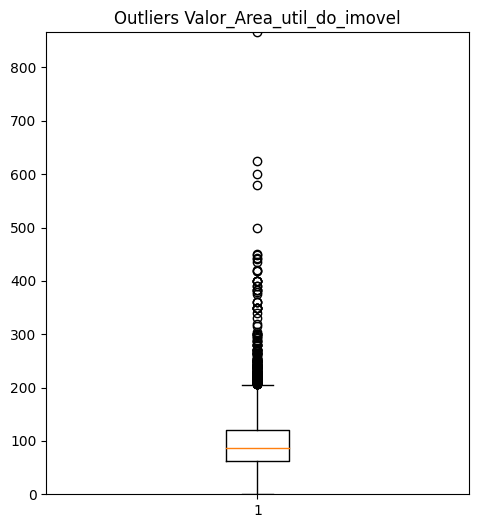

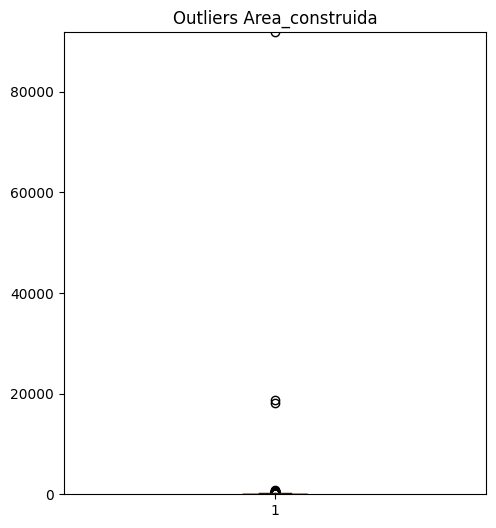

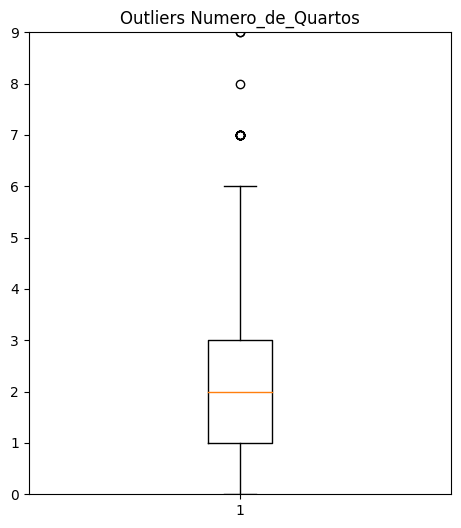

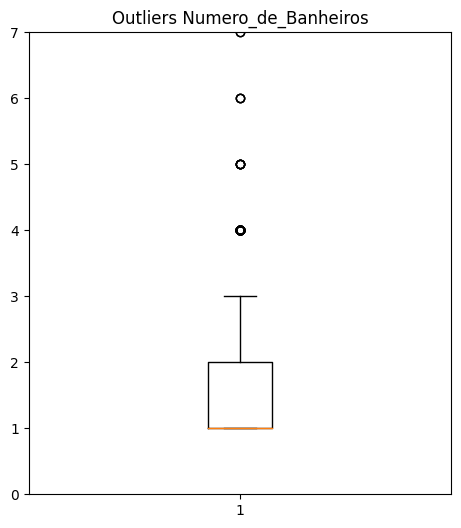

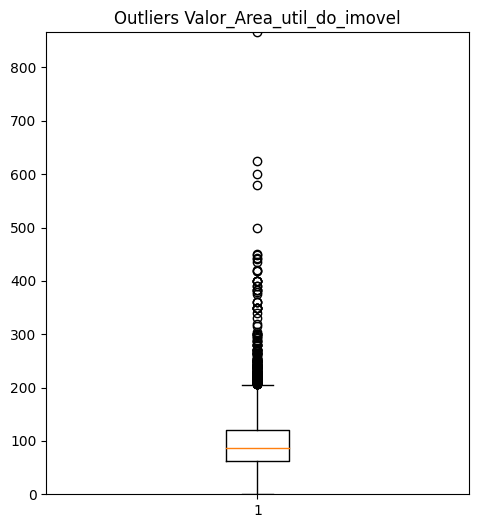

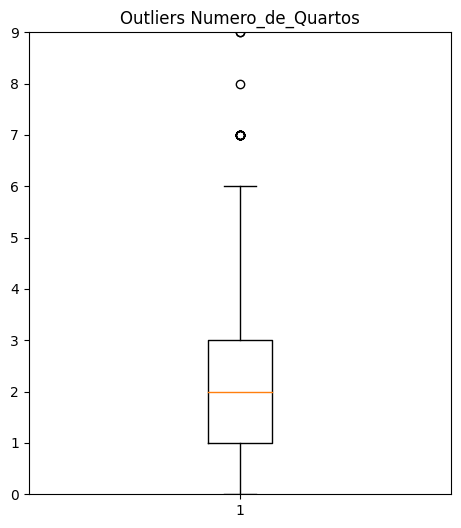

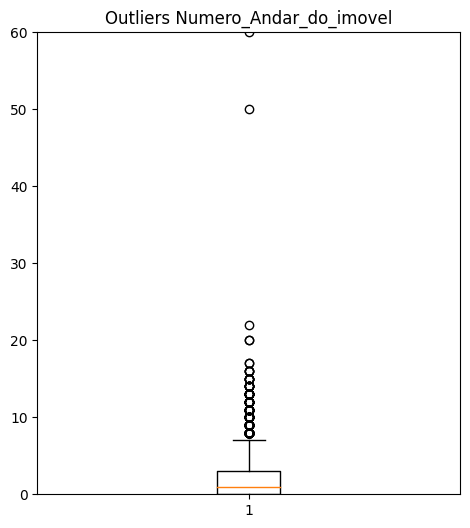

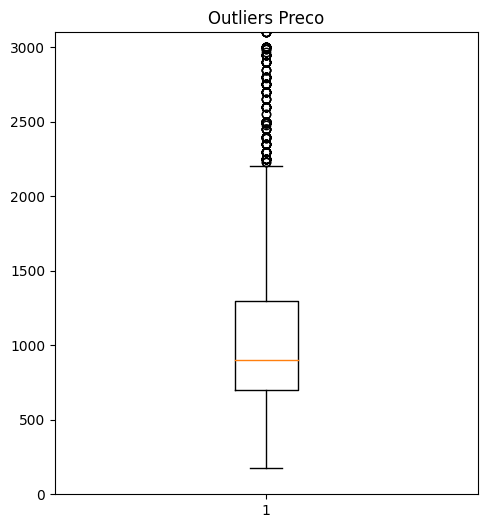

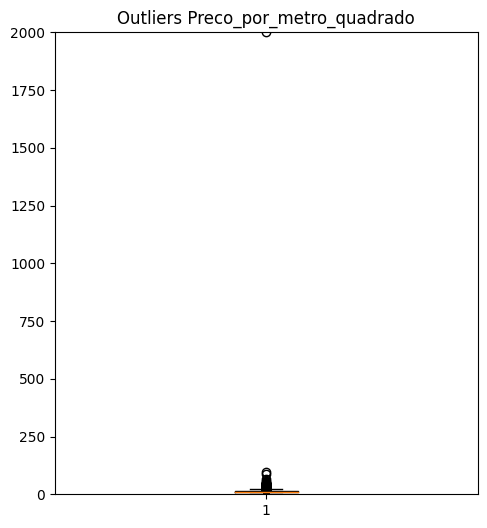

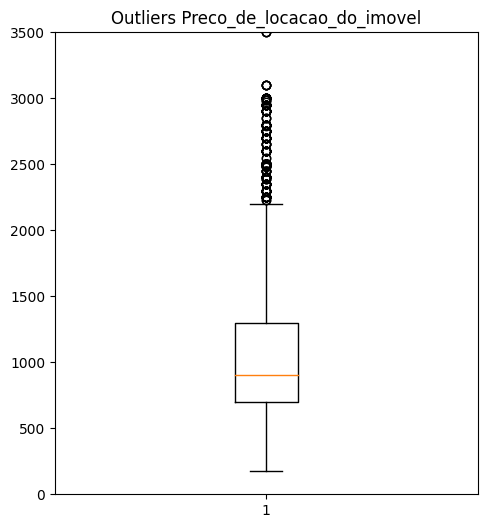

In [58]:
todos_outliers = pd.DataFrame()
lista_numerica = ['Valor_Area_util_do_imovel','Area_construida','Numero_de_Quartos',
'Numero_de_Banheiros','Valor_Area_util_do_imovel','Numero_de_Quartos','Numero_Andar_do_imovel','Preco',
                  'Preco_por_metro_quadrado','Preco_de_locacao_do_imovel']
for variavel_numerica in lista_numerica:
    outliers = detect_outliers(df_final, variavel_numerica)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot(df_final[variavel_numerica])
    plt.title(f'Outliers {variavel_numerica}')
    max = df_final[variavel_numerica].max()
    plt.ylim([0, max])

    print(f'____')
    print(f'{variavel_numerica}: ' + str(outliers.shape[0]))
    todos_outliers = pd.concat([todos_outliers,outliers])

    



                         

In [59]:
# Removendo duplicatas
todos_outliers = todos_outliers.drop_duplicates()

# Contando o número total de outliers
num_total_outliers = todos_outliers.shape[0]
num_total_records = df_final.shape[0]
percent_outliers = num_total_outliers/num_total_records
# Calculando a porcentagem de outliers
print('___________________________________')
print(f"Total de outliers: {num_total_outliers}")
print(f"Total Registros da base: {num_total_records}")
print(f"Percentual de outliers: {percent_outliers}%")

___________________________________
Total de outliers: 937
Total Registros da base: 7278
Percentual de outliers: 0.12874416048364937%


In [60]:
print('QTD Registros antes: ' + str(df_final.shape[0]))
# Removendo os outliers do DataFrame original
df_final = df_final.drop(todos_outliers.index)
print('QTD Registros Depois: ' + str(df_final.shape[0]))

QTD Registros antes: 7278
QTD Registros Depois: 6341


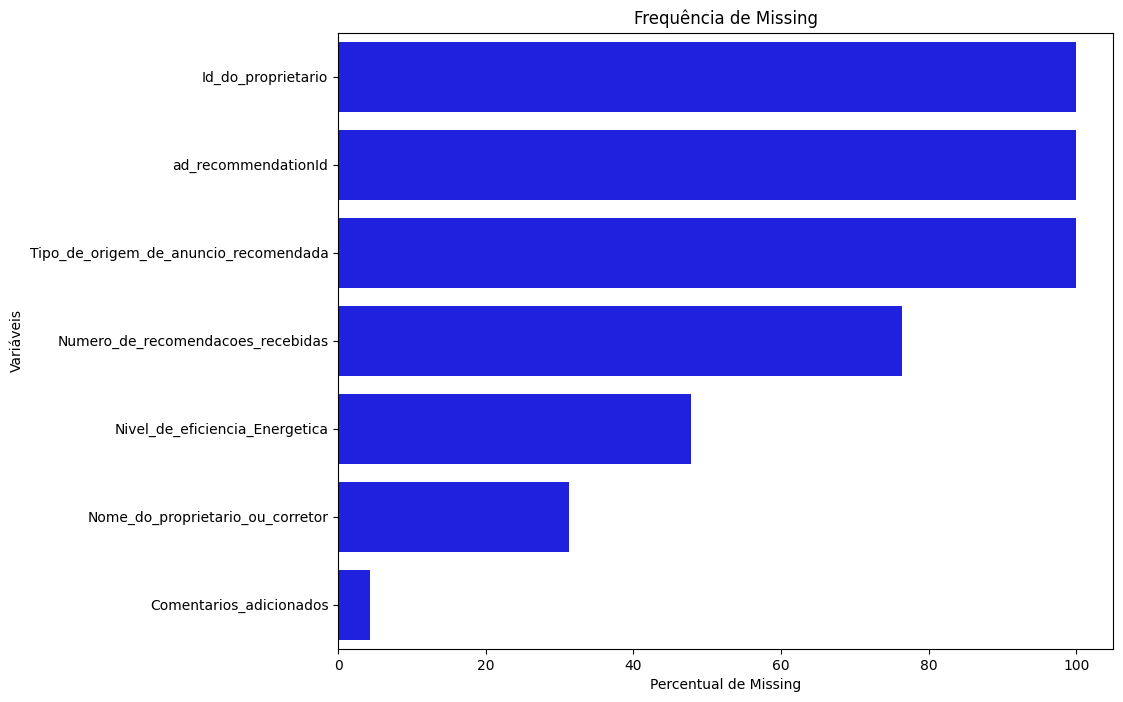

In [61]:
# Analise de Missing

missing_data = df_final.isnull().sum().sort_values(ascending=False)

missing_data_percent = (missing_data / len(df_final)) * 100

# Filtrando apenas as variáveis que têm dados ausentes
missing_data_percent = missing_data_percent[missing_data_percent > 0]

plt.figure(figsize=(10,8))
sns.barplot(x=missing_data_percent.values, y=missing_data_percent.index, color='blue')
plt.title('Frequência de Missing')
plt.xlabel('Percentual de Missing')
plt.ylabel('Variáveis')
plt.show()


In [62]:
# filtrando a série
filtered = missing_data_percent[missing_data_percent > 20]

# obtendo os índices como uma lista
columns_to_drop = filtered.index.tolist()

print(columns_to_drop)

['Id_do_proprietario', 'ad_recommendationId', 'Tipo_de_origem_de_anuncio_recomendada', 'Numero_de_recomendacoes_recebidas', 'Nivel_de_eficiencia_Energetica', 'Nome_do_proprietario_ou_corretor']


In [63]:
# Exclui as colunas do dataframe
df_final = df_final.drop(columns=columns_to_drop)

# Exlui colunas com informacoes repetidas
df_final = df_final.drop('Tipo_de_Imovel', axis=1)
df_final = df_final.drop('Url_da_Pagina_do_imovel', axis=1)
df_final = df_final.drop('Url_do_Imovel', axis=1)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical(df, column, plot_type='bar', show_percentage=False):
    if plot_type == 'bar':
        # criação de uma figura com um subplot
        fig, ax = plt.subplots(figsize=(10, 5))

        # criação do gráfico de contagem usando seaborn
        sns.countplot(x=column, data=df, ax=ax)

        if show_percentage:
            # cálculo dos percentuais
            total = len(df[column])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='bottom')

        # rotação dos rótulos do eixo x para melhor legibilidade
        for label in ax.get_xticklabels():
            label.set_rotation(45)

        # ajuste automático do layout do subplot
        plt.tight_layout()

    elif plot_type == 'pie':
        # criação de uma figura com um subplot
        fig, ax = plt.subplots(figsize=(10, 5))

        # agrupamento dos dados por categoria
        data_counts = df[column].value_counts()

        # criação do gráfico de pizza
        ax.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90)

        # aspecto igual para tornar a pizza circular
        ax.axis('equal')

        # título do gráfico
        ax.set_title(column)

    # exibir a figura com o gráfico
    plt.show()


In [65]:
df_final.shape[0]

6341

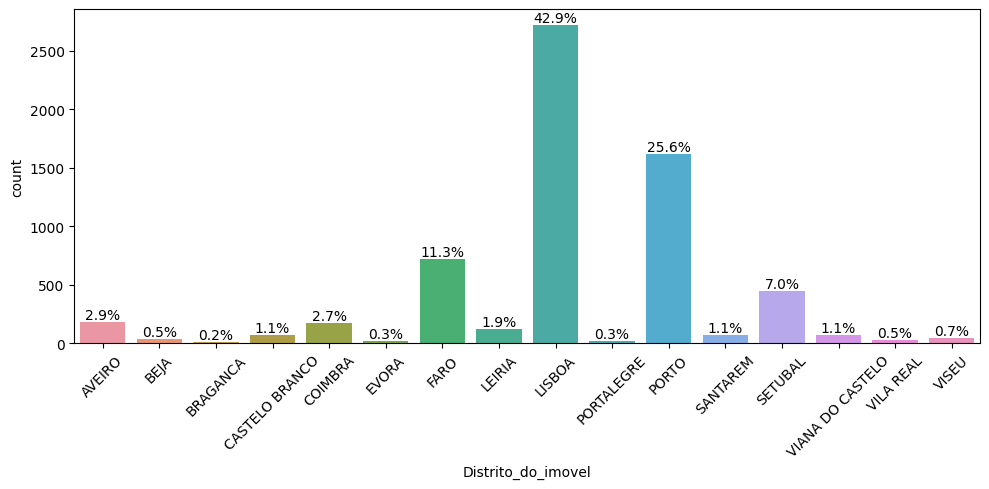

In [66]:
plot_categorical(df_final,'Distrito_do_imovel',show_percentage=True)

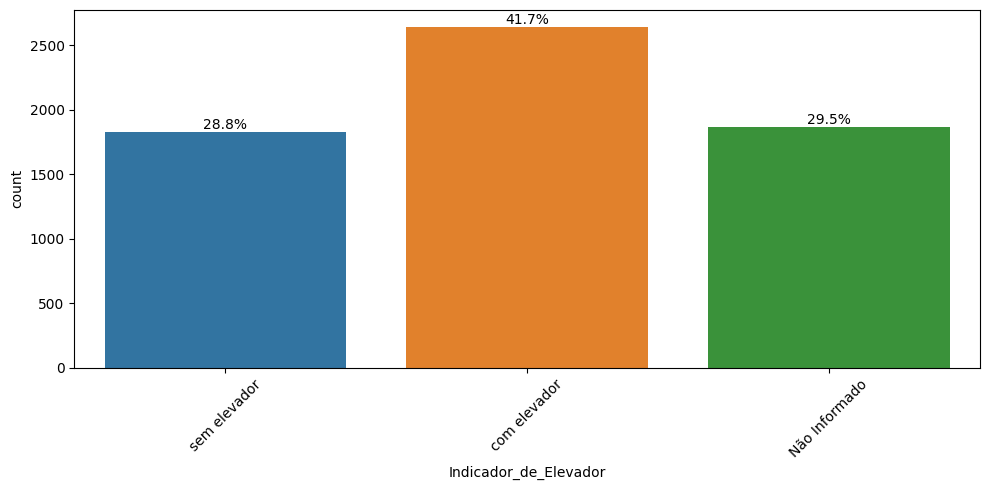

In [67]:
# ANALISE VARIAVEL INDICADOR ELEVADOR
df_final['Indicador_de_Elevador'] = df_final['Indicador_de_Elevador'].replace('0', 'Não Informado')
plot_categorical(df_final,'Indicador_de_Elevador',show_percentage=True)

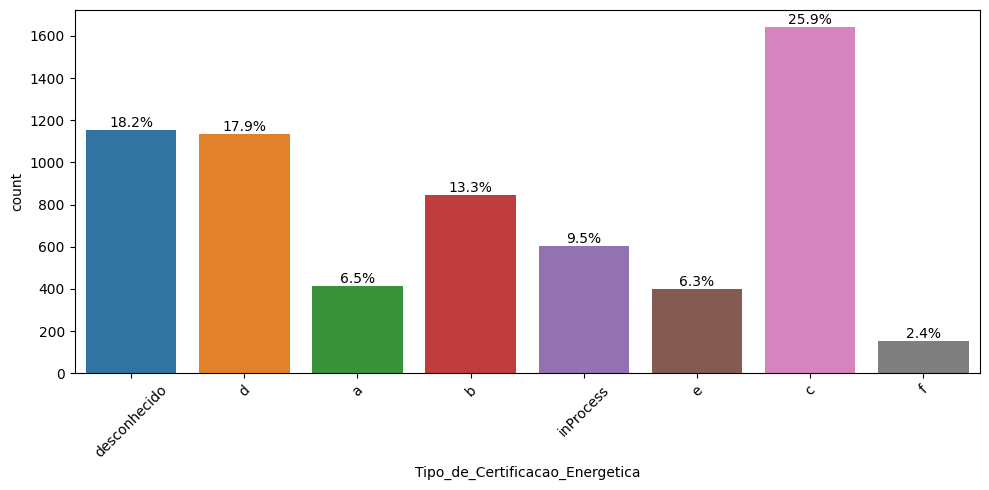

In [68]:
# ANALISE VARIAVEL CERTIFICACAO ENERGETICA
list_to_replace =['exempt','unknown']
df_final['Tipo_de_Certificacao_Energetica'] = df_final['Tipo_de_Certificacao_Energetica'].replace(list_to_replace, 'desconhecido')
df_final['Tipo_de_Certificacao_Energetica'] = df_final['Tipo_de_Certificacao_Energetica'].replace('aPlus', 'a')
df_final['Tipo_de_Certificacao_Energetica'] = df_final['Tipo_de_Certificacao_Energetica'].replace('g', 'f')

plot_categorical(df_final,'Tipo_de_Certificacao_Energetica',show_percentage=True)

In [69]:
# ANALISE TIPO DE CONSTRUCAO
df_final['Tipo_de_Construcao'] = df_final['Tipo_de_Construcao'].replace('1,0','Sobrado')
df_final['Tipo_de_Construcao'] = df_final['Tipo_de_Construcao'].replace('2,0','Casa')
df_final['Tipo_de_Construcao'] = df_final['Tipo_de_Construcao'].replace('3,0','Apartamento')
# agrupamento por 1 coluna
df_final.groupby('Tipo_de_Construcao').agg(qtd = ('RowId', 'count'))


qtd
Tipo_de_Construcao      
1                      4
2                     28
3                   6309

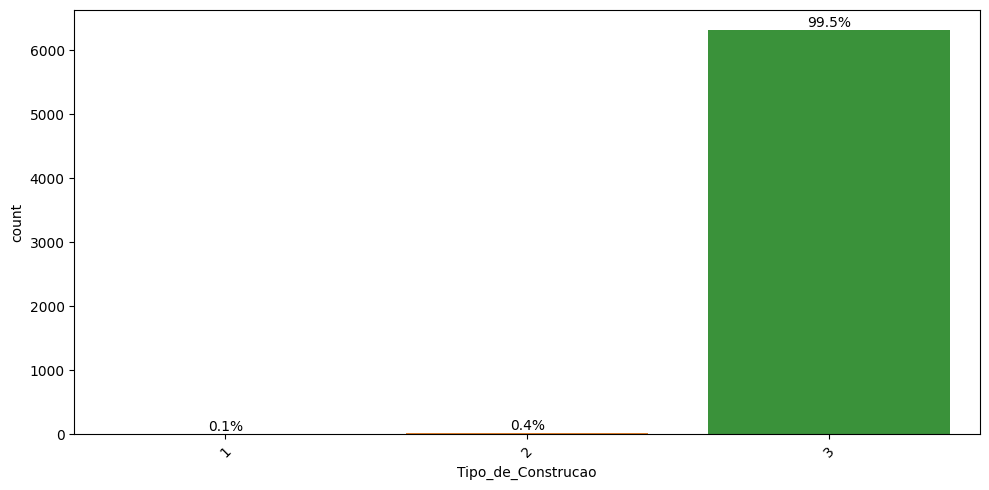

In [70]:
plot_categorical(df_final,'Tipo_de_Construcao',show_percentage=True)

In [71]:
# Exclui os 34 registros casa + sobrado
index_to_drop = df_final[(df_final['Tipo_de_Construcao'] == 'Sobrado') | (df_final['Tipo_de_Construcao'] == 'Casa')].index
df_final.drop(index_to_drop, inplace=True)

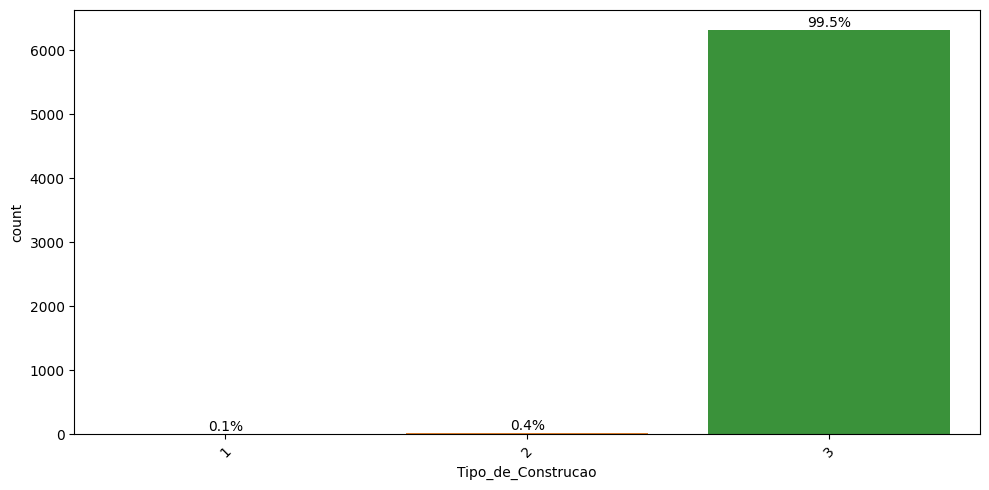

In [72]:
plot_categorical(df_final,'Tipo_de_Construcao',show_percentage=True)

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_frequencia_binaria(dataframe, coluna):
    frequencia = dataframe[coluna].value_counts()

    # Plotar gráfico de barras
    barras = plt.bar(frequencia.index, frequencia.values)

    # Adicionar valores no topo de cada barra
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width() / 2, altura,
                 '%d' % int(altura), ha='center', va='bottom')

    # Configurar rótulos e título
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title('Frequência de Valores Únicos - ' + str(coluna).replace("_"," "))

    # Definir o intervalo do eixo x para exibir apenas os valores -1, 0 e 1
    plt.xticks(np.arange(-1, 2, 1))

    # Exibir o gráfico
    plt.show()

def contar_frequencia_binaria(dataframe, coluna):
    frequencia = dataframe[coluna].value_counts()
    return frequencia

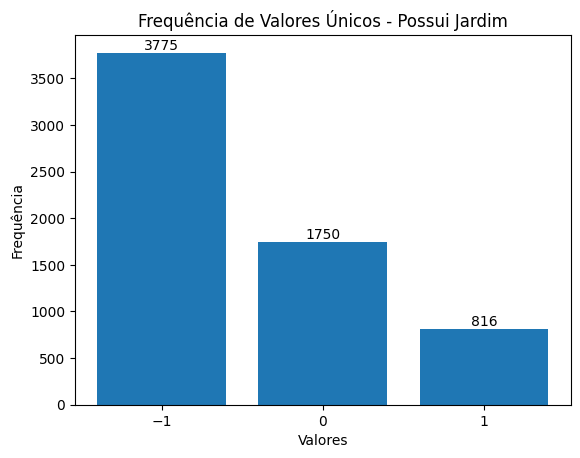

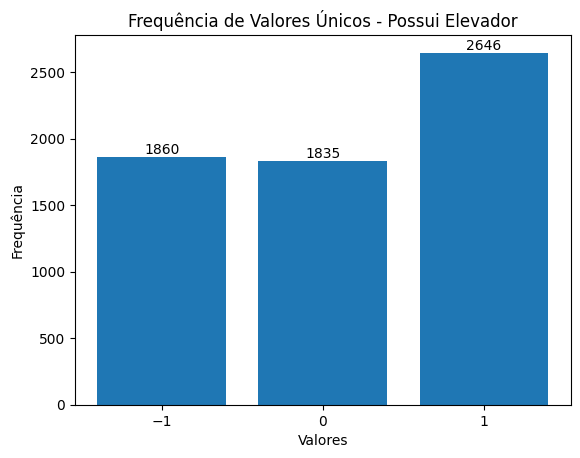

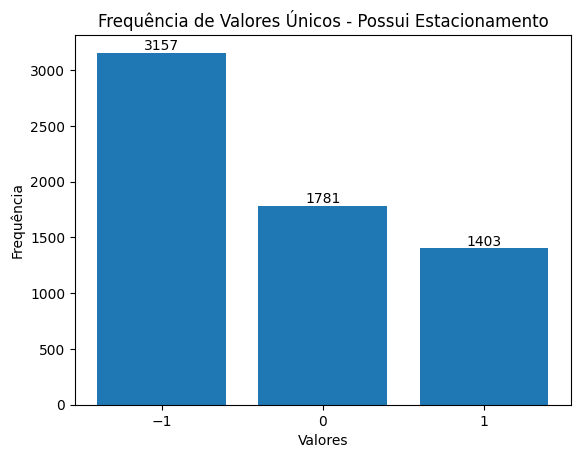

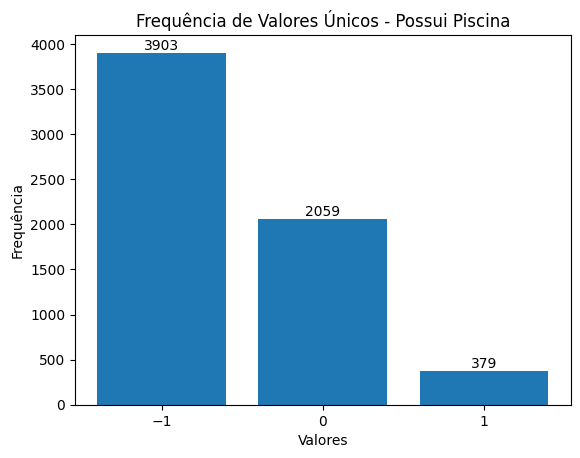

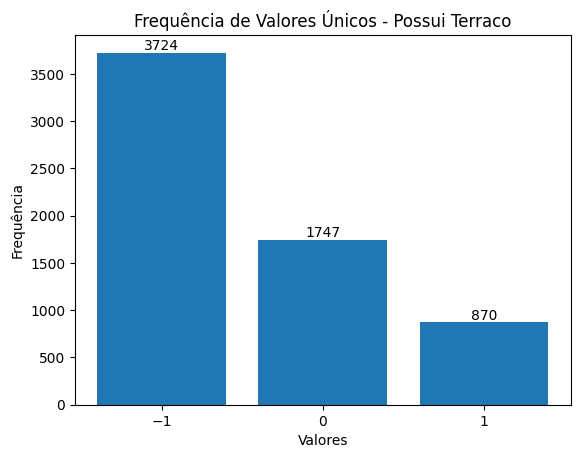

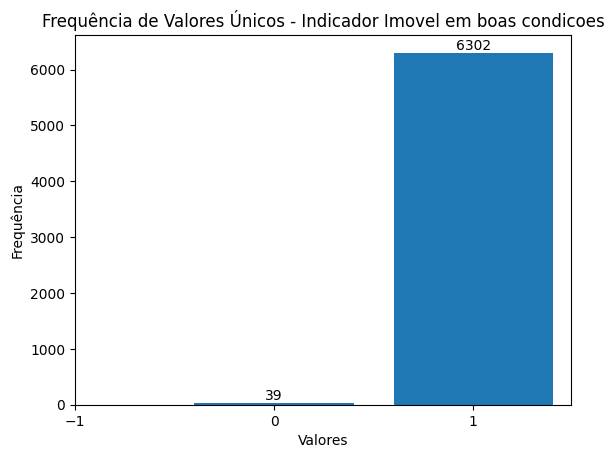

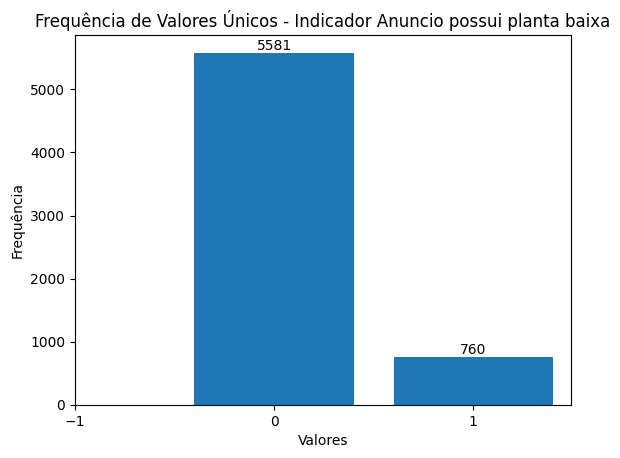

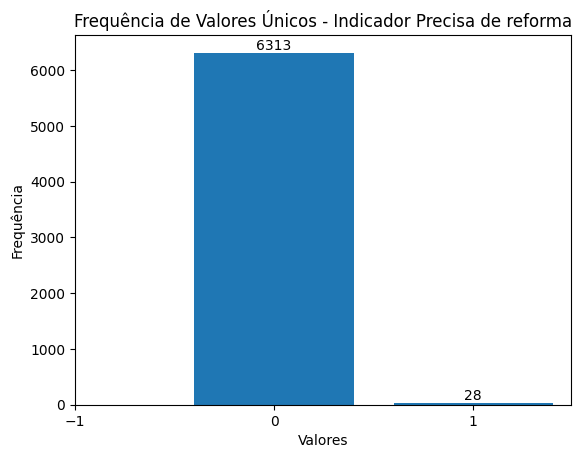

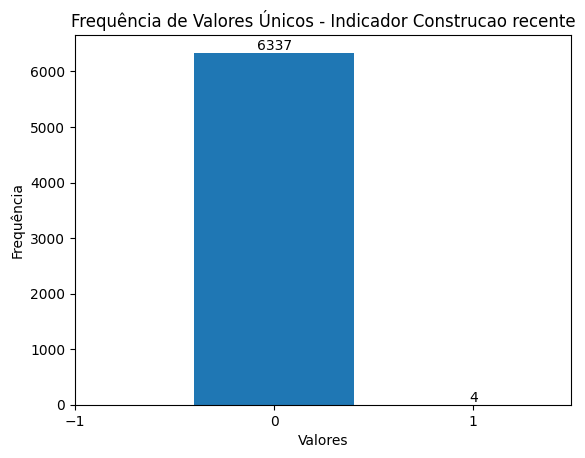

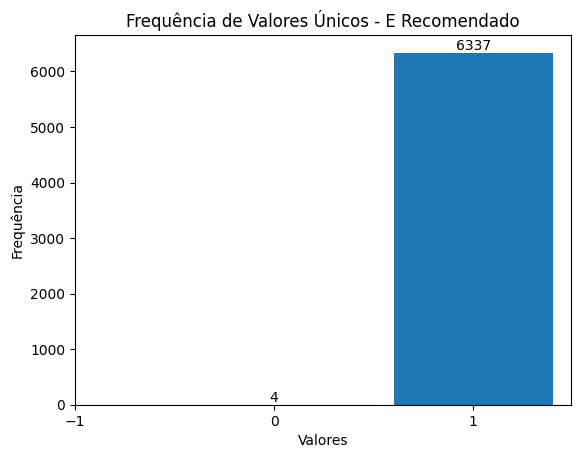

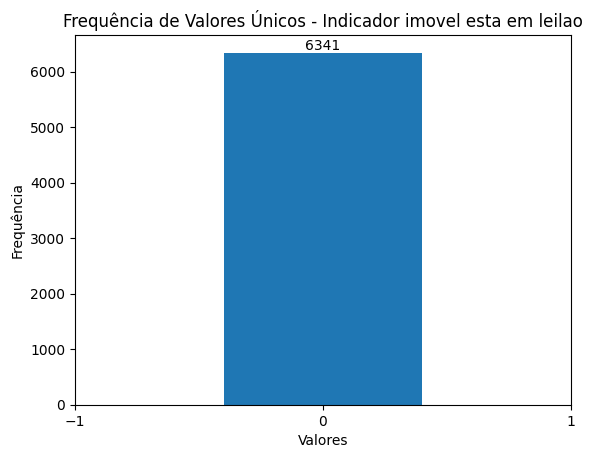

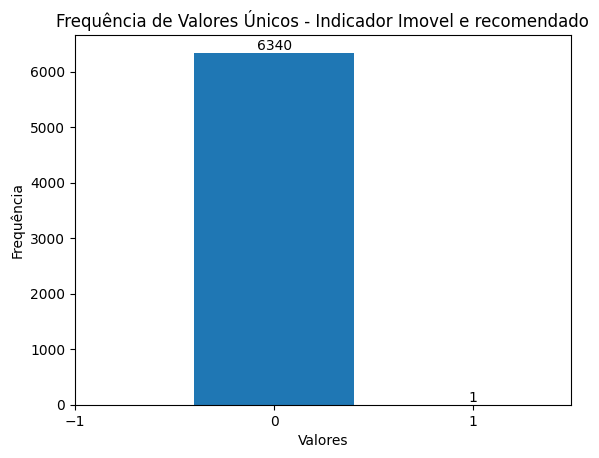

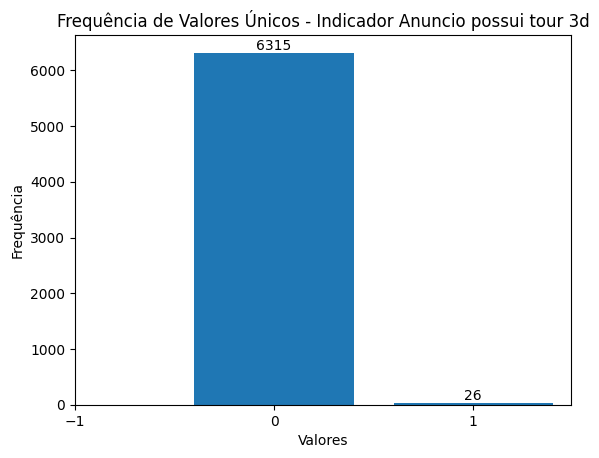

In [74]:

for variavelBinaria in bin_vars:
    plotar_frequencia_binaria(df_final,variavelBinaria)

In [75]:
column_list_to_drop = ['Indicador_Precisa_de_reforma','E_Recomendado','Indicador_imovel_esta_em_leilao',
                       'Indicador_Imovel_e_recomendado','Indicador_Imovel_em_boas_condicoes','Indicador_Construcao_recente',
                      'Indicador_Anuncio_possui_tour_3d']

# Exclui as colunas do dataframe
df_final = df_final.drop(columns=column_list_to_drop)

In [76]:
def exploratory_analysis(df, columns):
    for column in columns:
        if column in df.columns:
            data = df[column]
            print(f"{column}")
            statistics = data.describe().apply(lambda x: '{:.2f}'.format(x))
            print(statistics.to_string())
            plt.hist(data, bins=10, edgecolor='k')
            plt.xlabel(column)
            plt.ylabel('Frequência')
            plt.title(f'Histograma de {column}')
            plt.show()
            plt.boxplot(data)
            plt.ylabel(column)
            plt.title(f'Gráfico de Caixa (Boxplot) de {column}')
            plt.show()
        else:
            print(f"A coluna '{column}' não existe no DataFrame.")





Valor_Area_util_do_imovel
count    6341.00
mean       91.40
std        36.82
min        15.00
25%        64.00
50%        85.00
75%       115.00
max       205.00


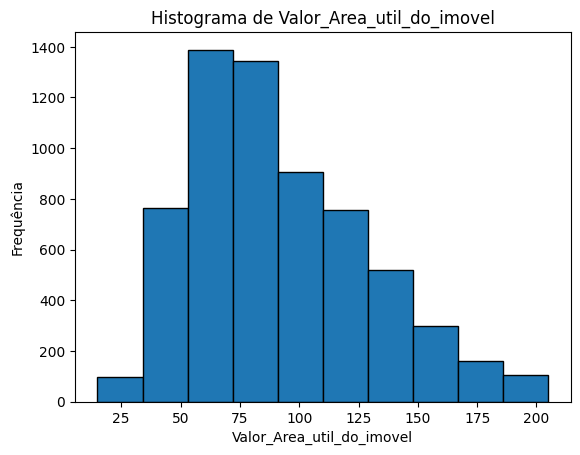

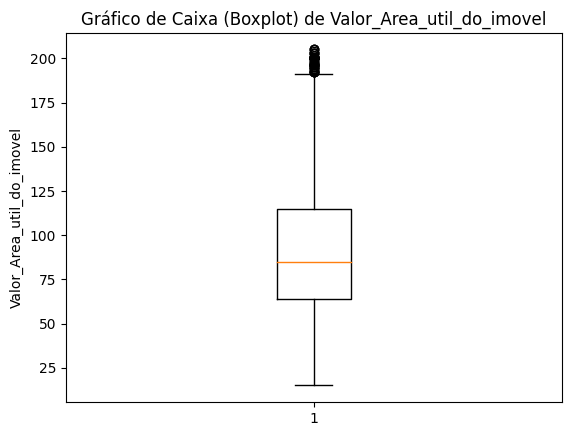

Area_construida
count    6341.00
mean       91.38
std        36.83
min        15.00
25%        64.00
50%        85.00
75%       115.00
max       205.00


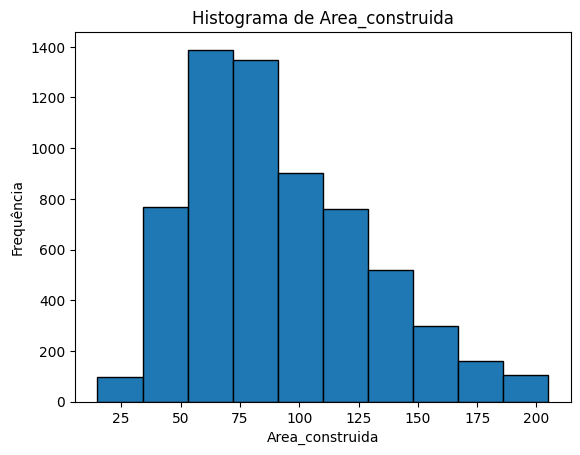

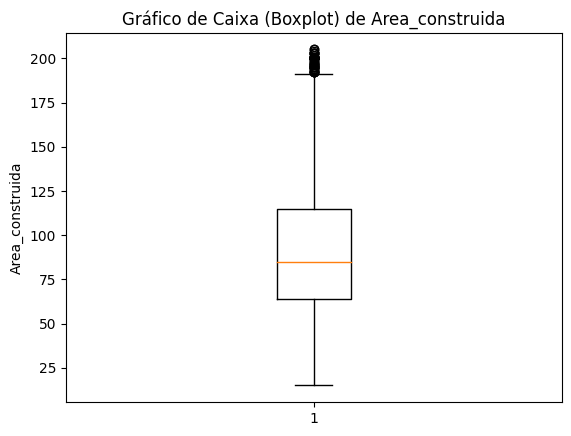

Numero_Andar_do_imovel
count    6341.00
mean        1.40
std         1.77
min        -1.00
25%         0.00
50%         1.00
75%         2.00
max         7.00


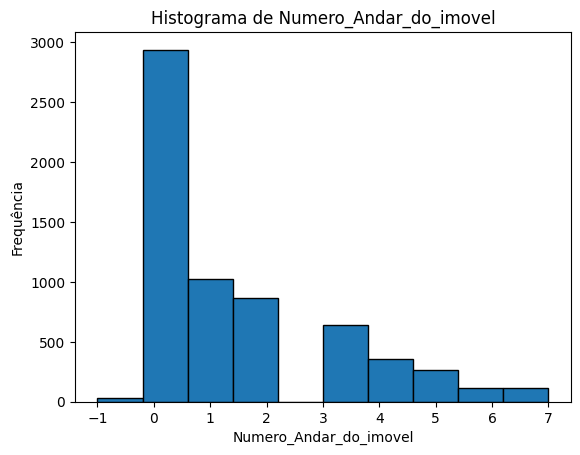

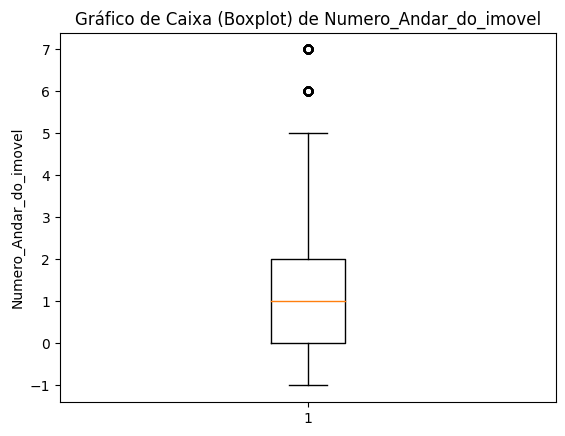

Tipo_de_Construcao
count    6341.00
mean        2.99
std         0.08
min         1.00
25%         3.00
50%         3.00
75%         3.00
max         3.00


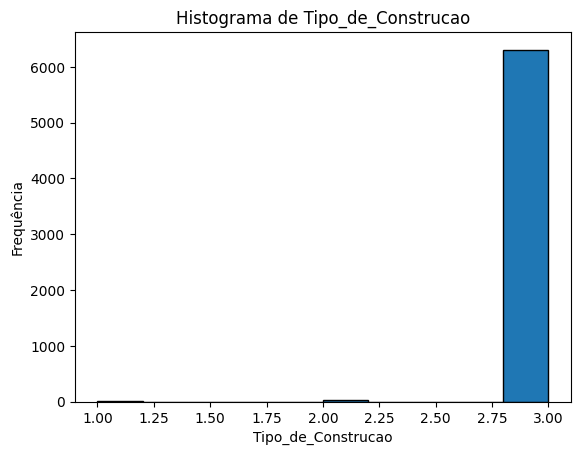

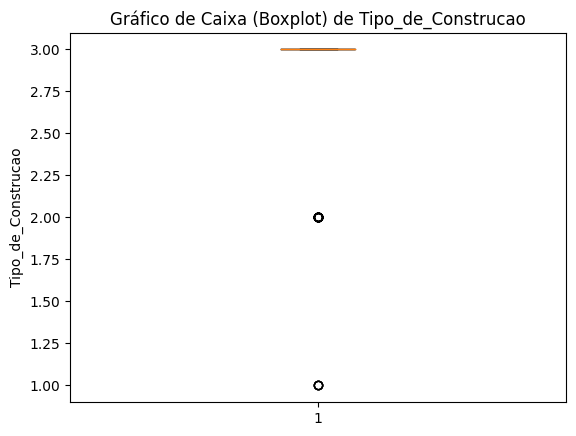

Numero_de_Banheiros
count    6341.00
mean        1.46
std         0.61
min         1.00
25%         1.00
50%         1.00
75%         2.00
max         3.00


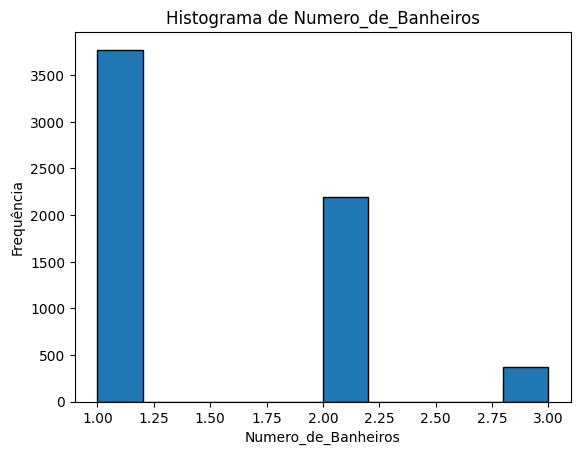

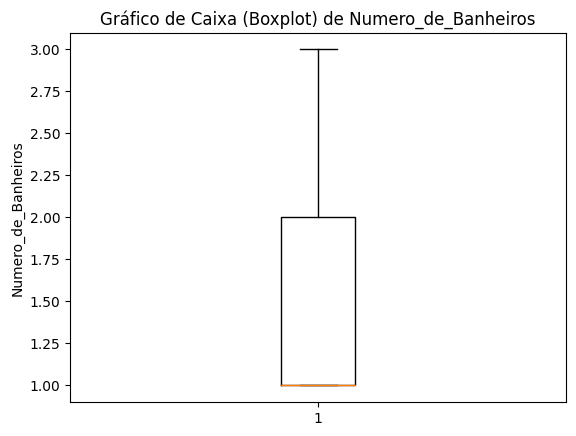

Numero_de_Quartos
count    6341.00
mean        1.96
std         1.01
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         6.00


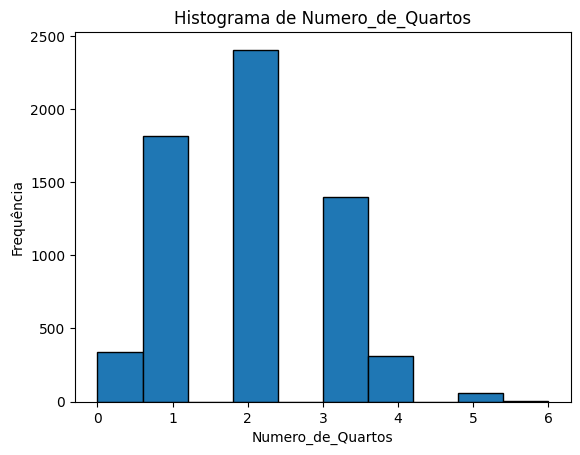

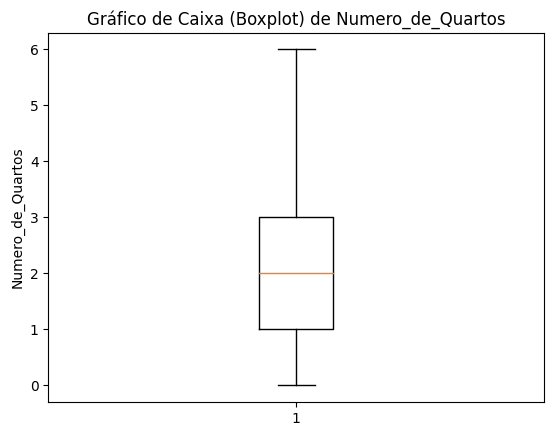

Numero_de_fotos_do_anuncio
count    6341.00
mean       16.43
std         9.13
min         0.00
25%        10.00
50%        15.00
75%        21.00
max        79.00


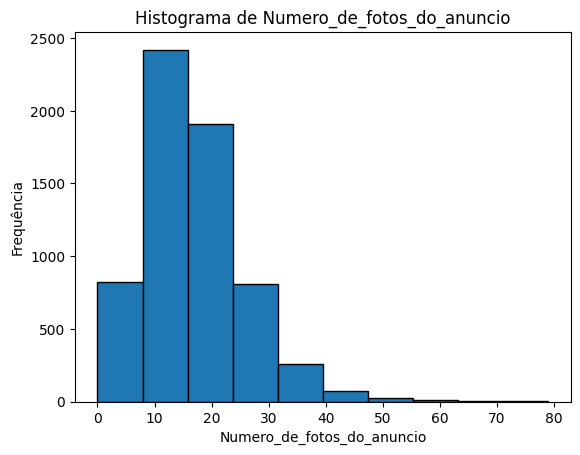

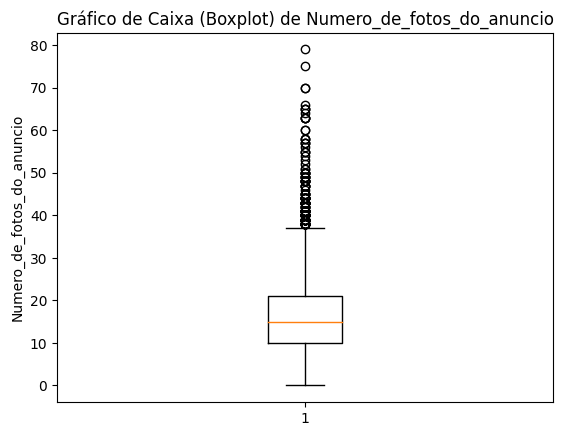

Numero_de_videos_do_anuncio
count    6341.00
mean        0.14
std         0.40
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         6.00


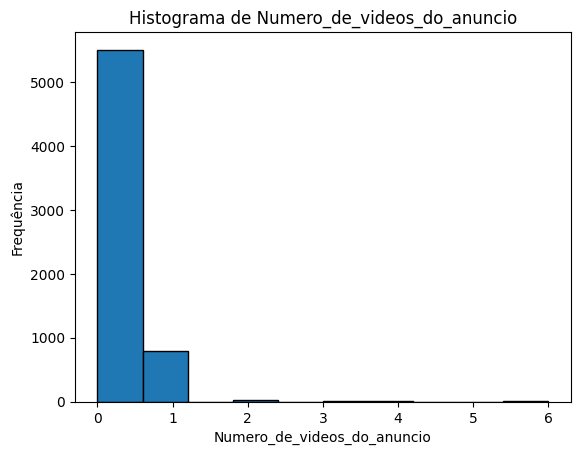

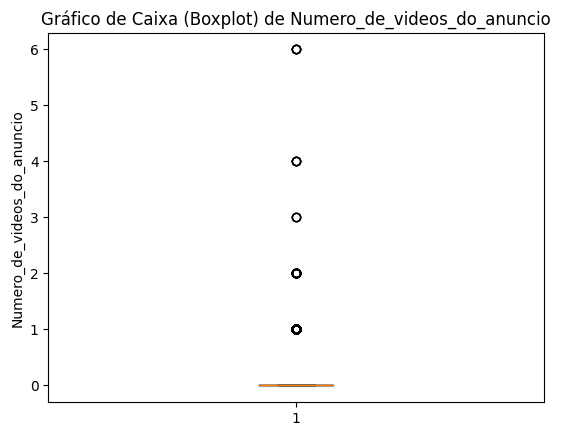

Tipo_de_Operacao
count    6341.00
mean        2.00
std         0.00
min         2.00
25%         2.00
50%         2.00
75%         2.00
max         2.00


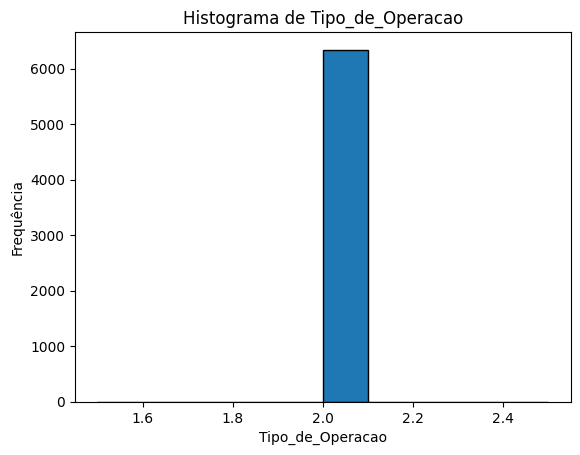

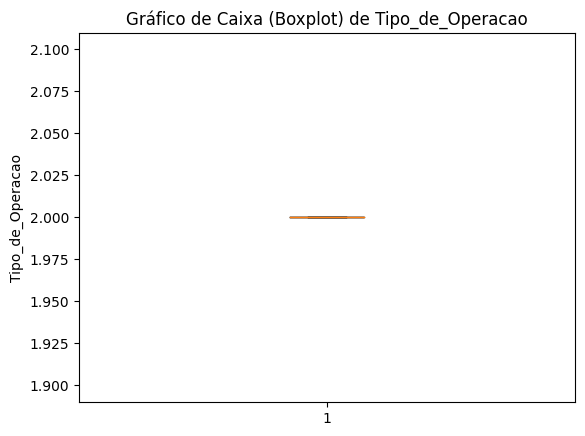

Tipo_de_proprietario
count    6341.00
mean        1.69
std         0.46
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         2.00


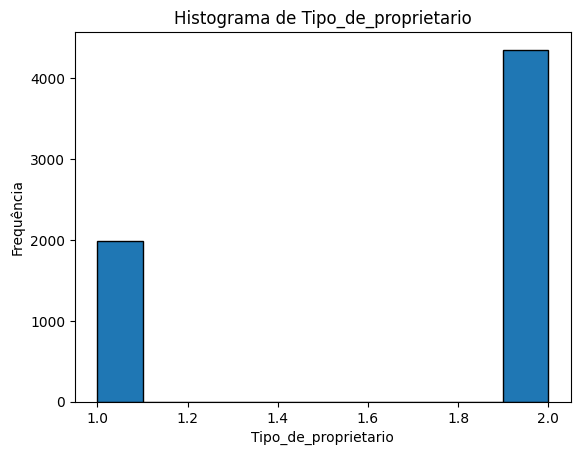

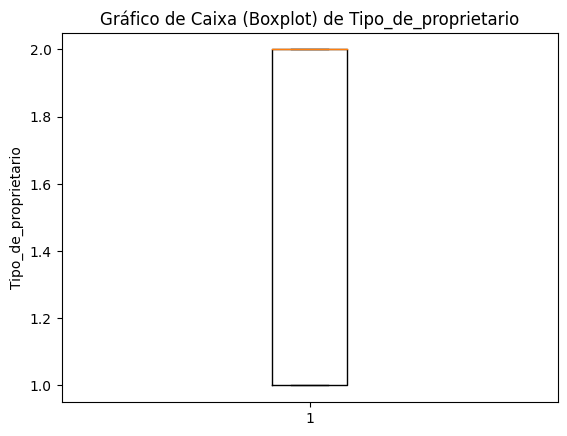

Numero_Faixa_Etaria_0-14
count     6341.00
mean     47810.36
std      33301.08
min       2705.00
25%      17461.00
50%      28508.00
75%      85452.00
max      85452.00


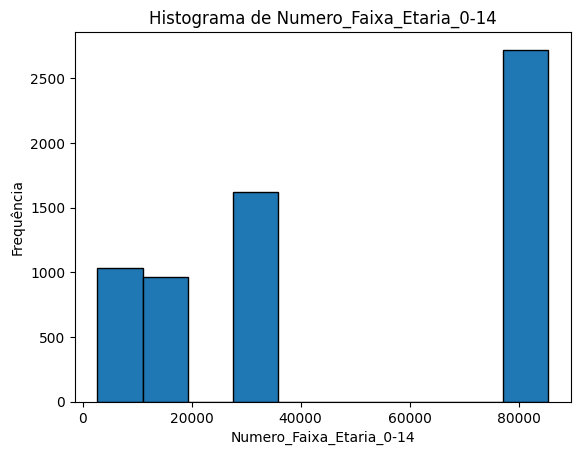

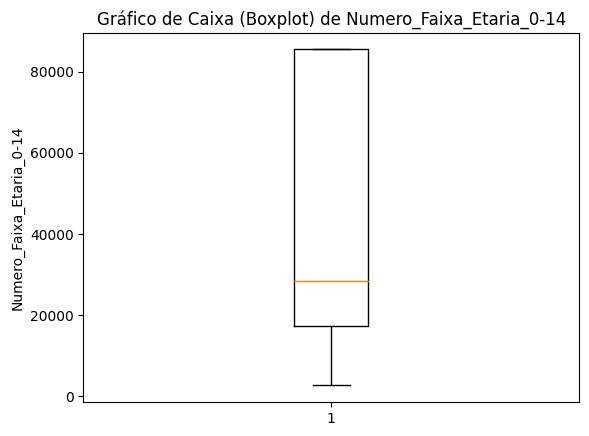

Numero_Faixa_Etaria_15-64
count      6341.00
mean     169353.04
std      100477.88
min       13313.00
25%       71308.00
50%      126342.00
75%      280124.00
max      280124.00


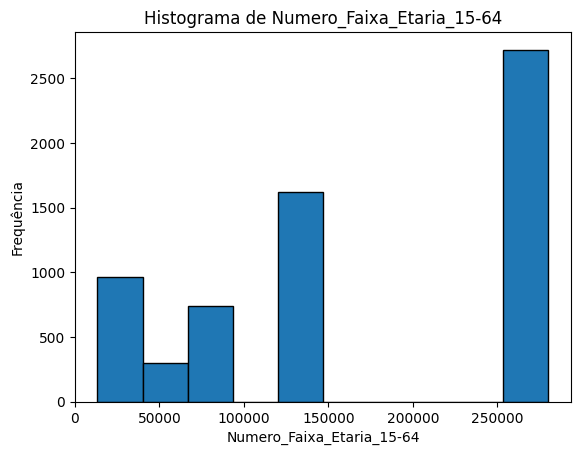

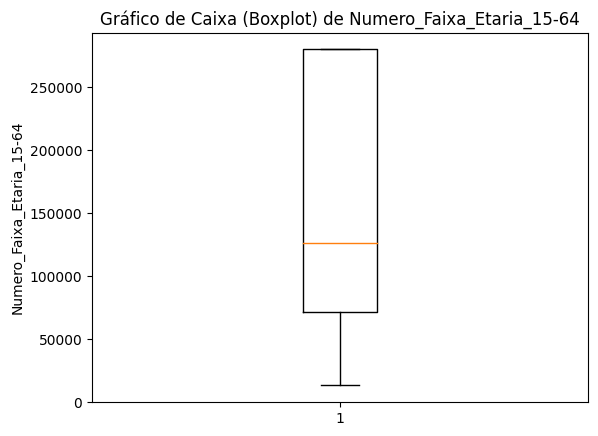

Numero_Faixa_Etaria_>65
count      6341.00
mean      83734.09
std       54809.56
min        6028.00
25%       25933.00
50%       61897.00
75%      143990.00
max      143990.00


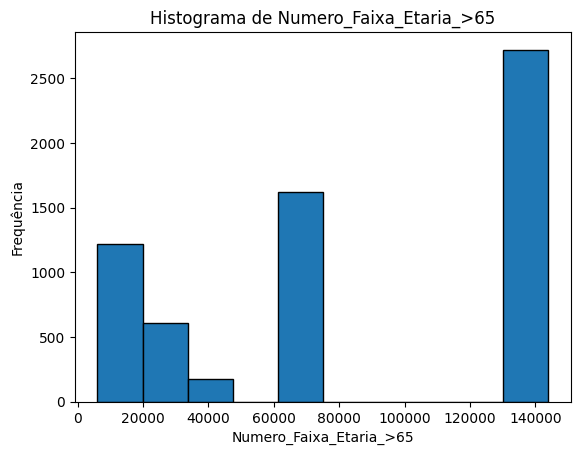

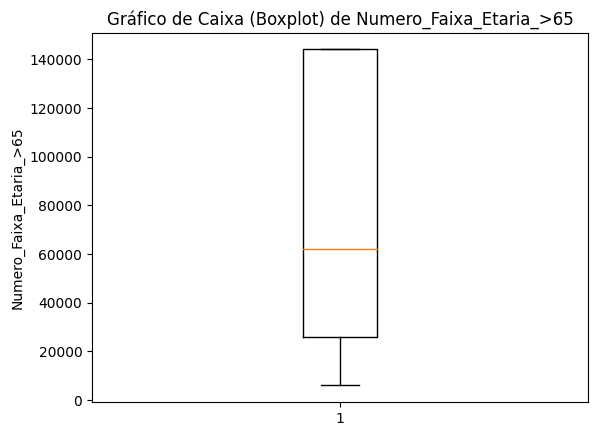

Quantidade_Hospitais_(Particulares_e_Publicos)
count    6341.00
mean       20.42
std        12.70
min         1.00
25%         4.00
50%        20.00
75%        33.00
max        33.00


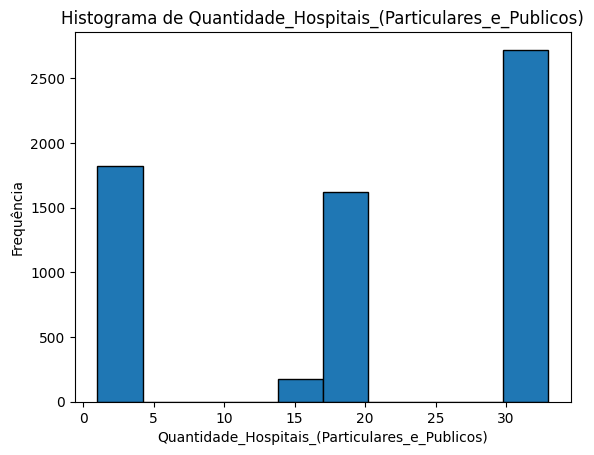

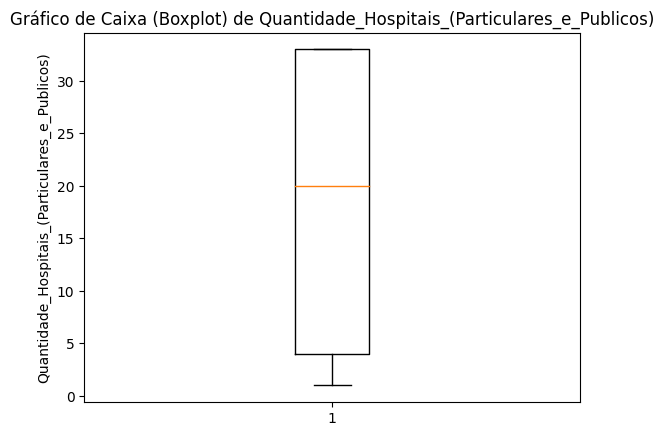

Quantidade_Farmacias
count    6341.00
mean      145.56
std       101.02
min         9.00
25%        30.00
50%       109.00
75%       256.00
max       256.00


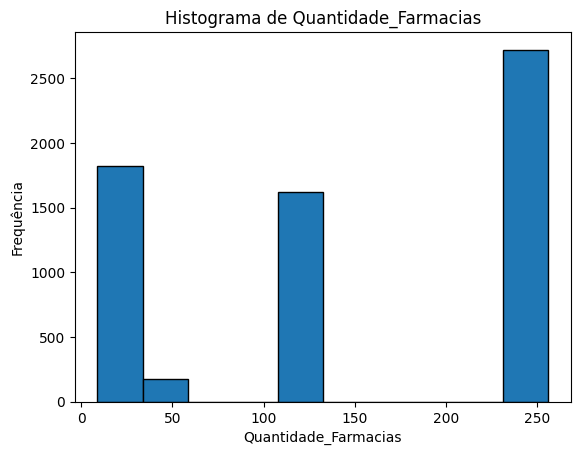

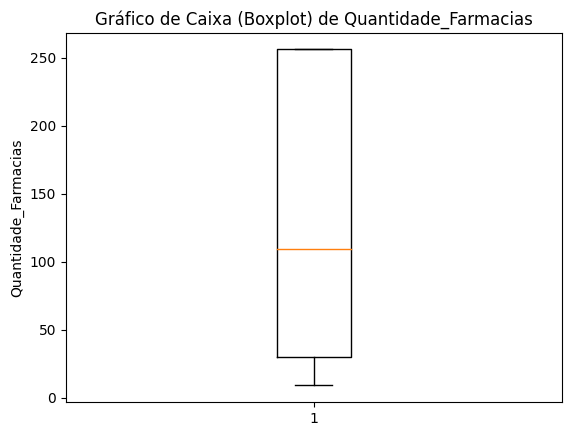

Quantidade_Construcoes_Novas
count    6341.00
mean       44.10
std        48.77
min         5.00
25%        10.00
50%        10.00
75%        69.00
max       181.00


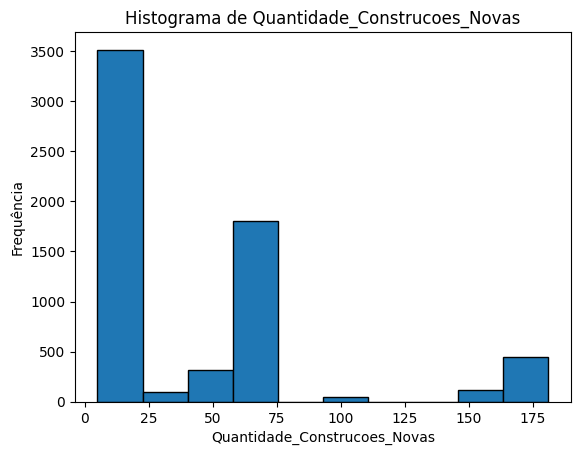

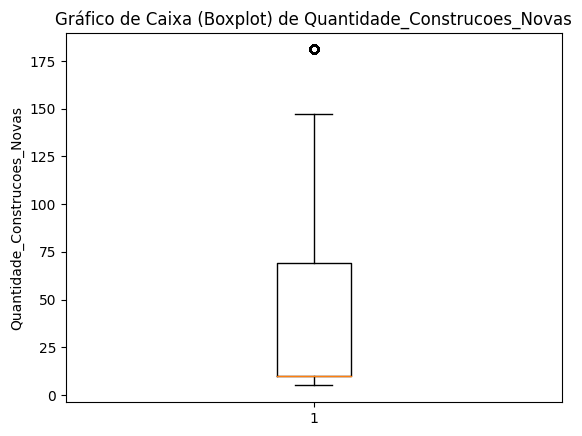

Quantidade_Escolas_Pre-Escolar_(4-6_anos)
count    6341.00
mean      170.95
std       102.73
min        17.00
25%        58.00
50%       133.00
75%       283.00
max       283.00


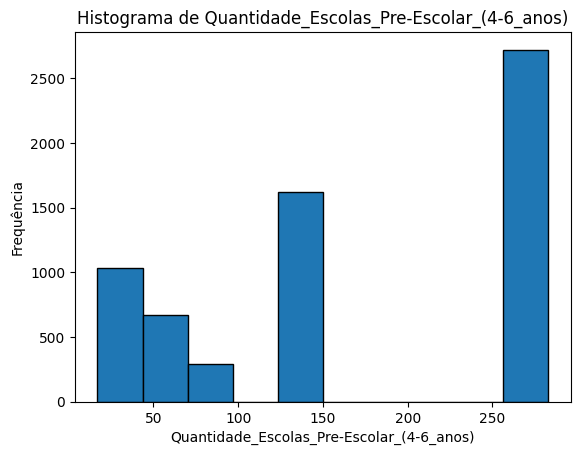

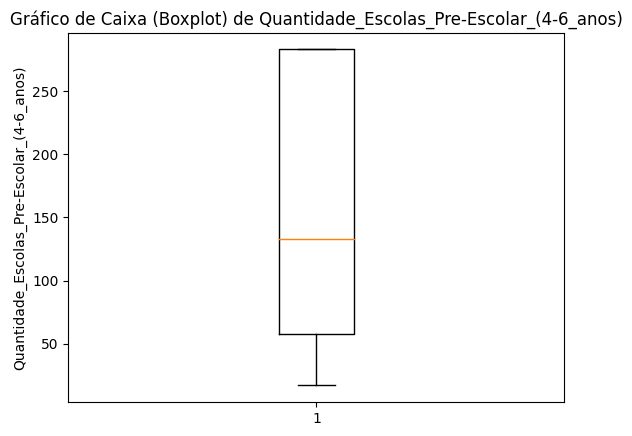

Quantidade_Escolas_Ciclo_2_(10-12_anos)
count    6341.00
mean       50.59
std        34.40
min         2.00
25%        10.00
50%        39.00
75%        88.00
max        88.00


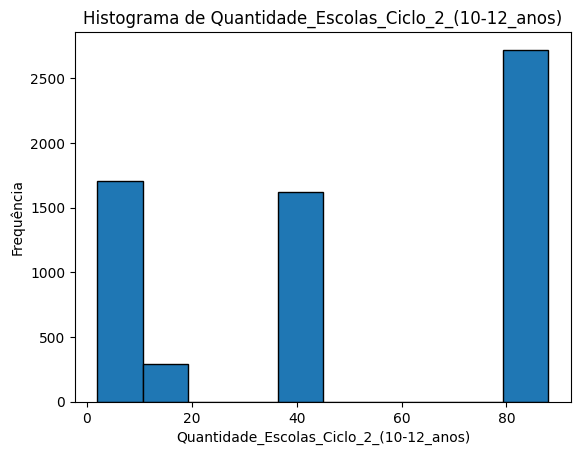

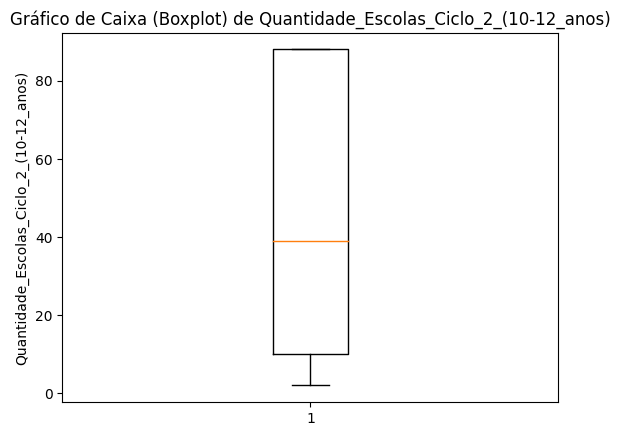

Quantidade_Escolas_Ciclo_3_(13-15_anos)
count    6341.00
mean       61.10
std        39.01
min         3.00
25%        12.00
50%        54.00
75%       102.00
max       102.00


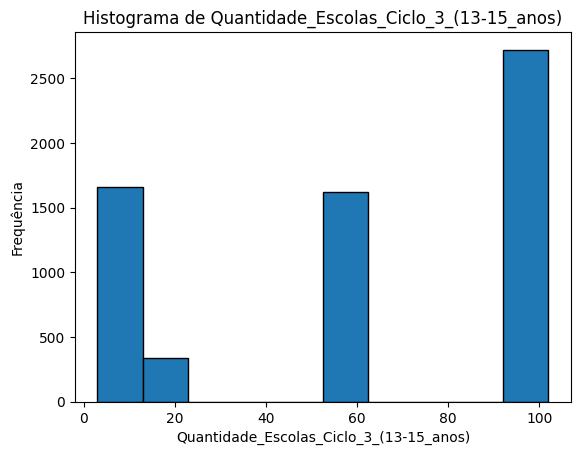

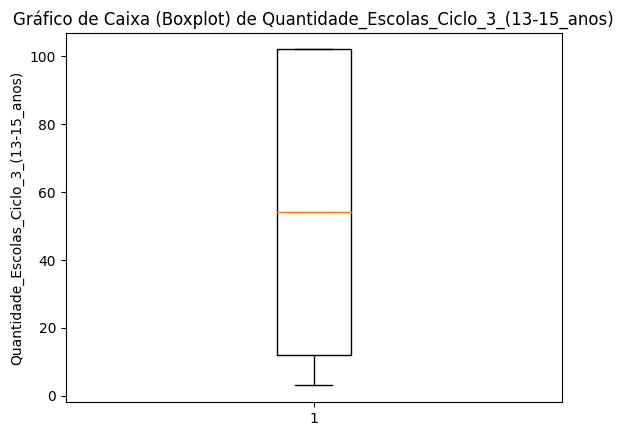

Quantidade_Shows_Exibicoes_Teatro
count    6341.00
mean     2185.38
std      1598.27
min        18.00
25%       212.00
50%      1688.00
75%      3914.00
max      3914.00


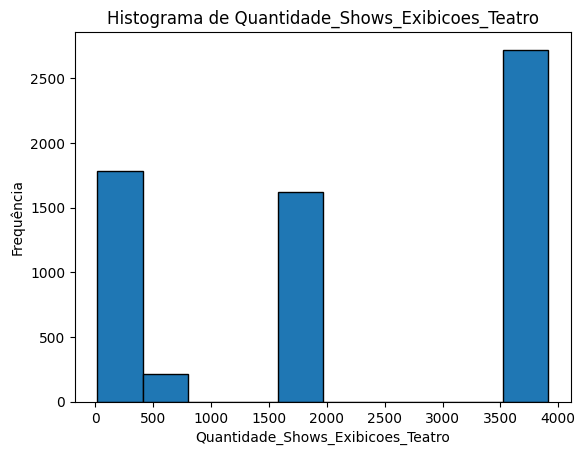

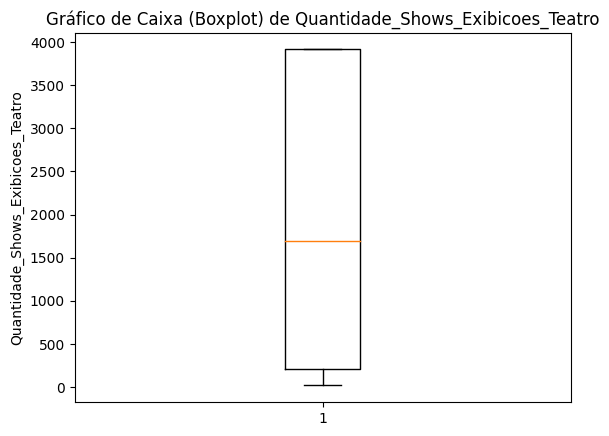

Quantidade_Cinemas
count    6341.00
mean       34.88
std        28.02
min         0.00
25%        10.00
50%        13.00
75%        67.00
max        67.00


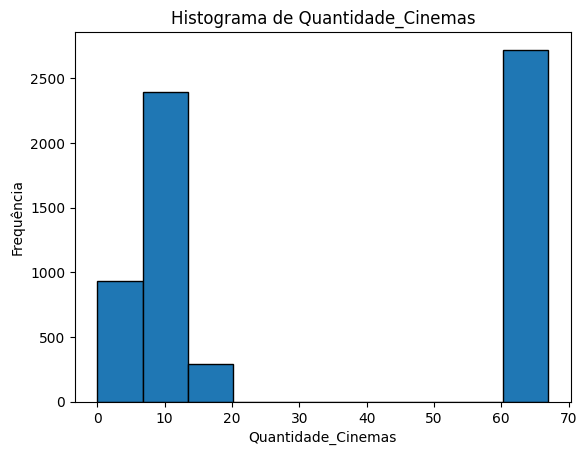

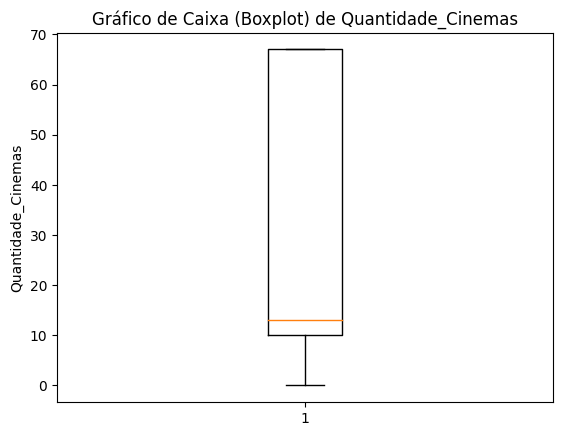

Clima_Ranking
count    6341.00
mean       22.56
std         5.34
min        13.00
25%        15.00
50%        26.00
75%        26.00
max        36.00


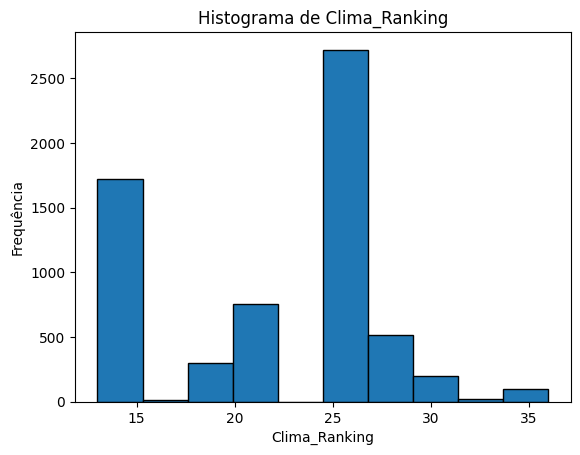

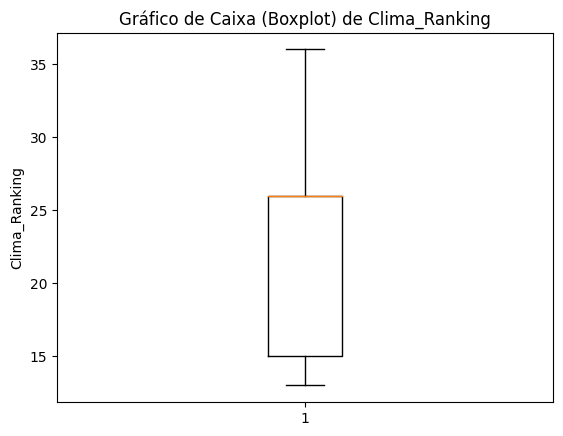

Ranking_Regional
count    6341.00
mean        2.63
std         3.45
min         1.00
25%         1.00
50%         2.00
75%         2.00
max        31.00


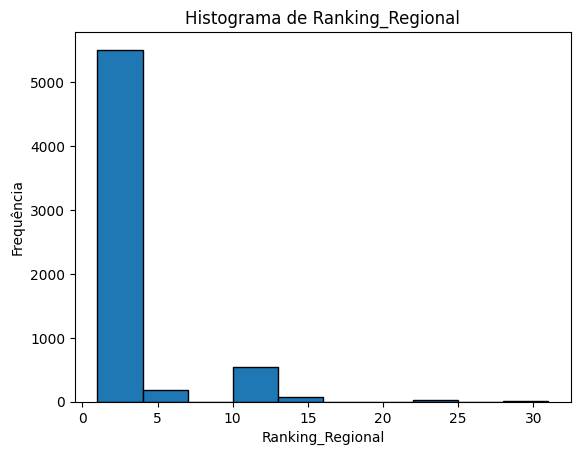

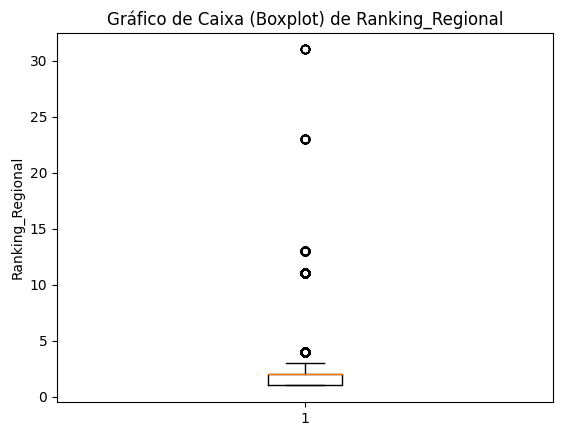

Tipo_de_Origem_do_anuncio
count    6341.00
mean        7.58
std        17.11
min         1.00
25%         2.00
50%         4.00
75%        11.00
max       111.00


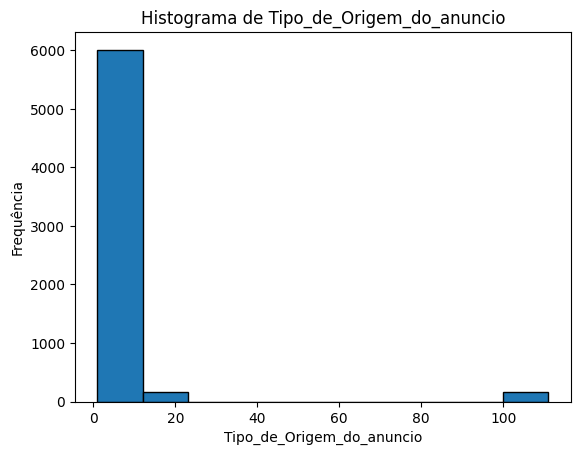

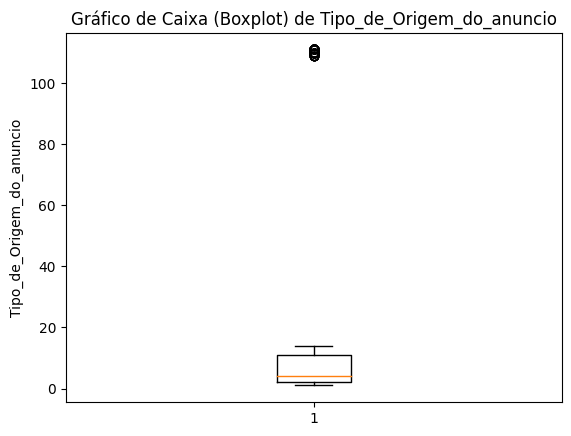

ad_typology
count    6341.00
mean        1.08
std         0.31
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         3.00


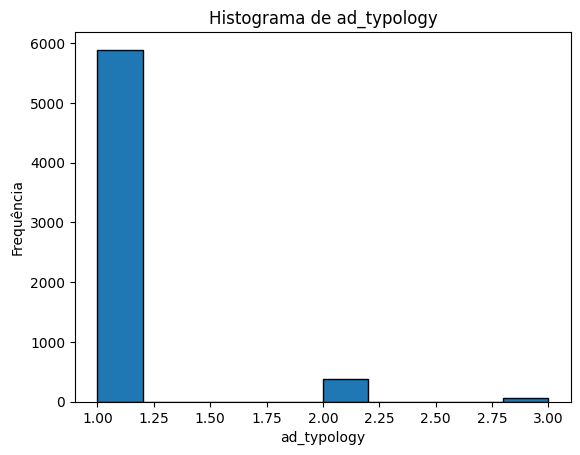

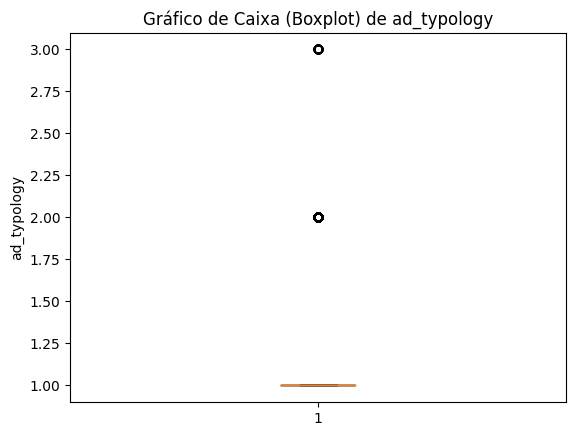

Preco
count    6341.00
mean      963.64
std       392.43
min       175.00
25%       700.00
50%       850.00
75%      1200.00
max      2200.00


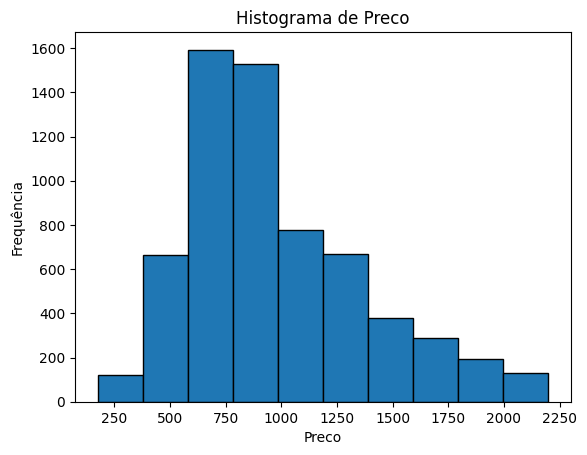

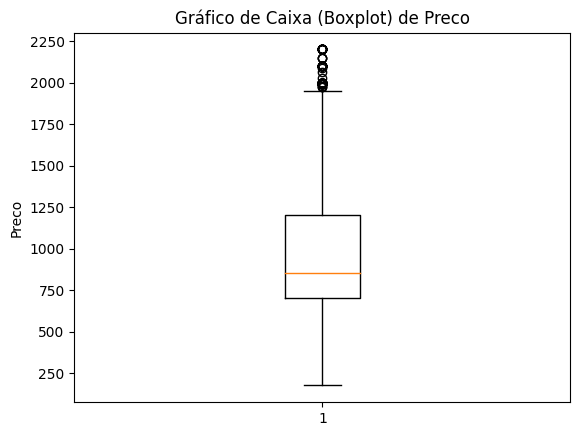

Preco_de_locacao_do_imovel
count    6341.00
mean      961.60
std       390.41
min       175.00
25%       700.00
50%       850.00
75%      1200.00
max      2200.00


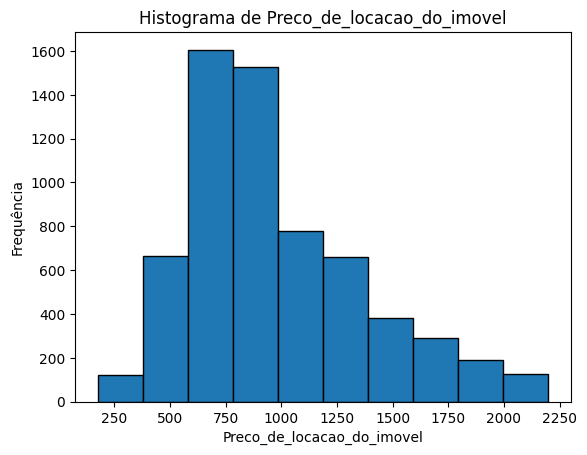

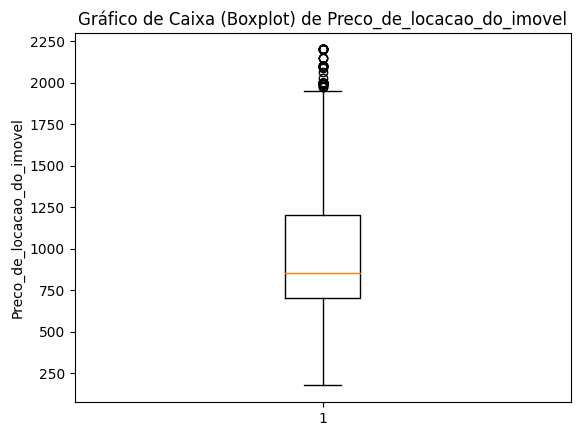

Preco_por_metro_quadrado
count    6341.00
mean       11.33
std         4.01
min         1.25
25%         8.47
50%        11.07
75%        13.83
max        23.08


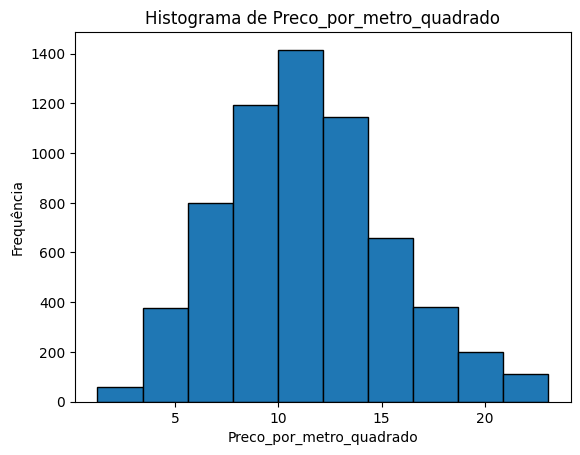

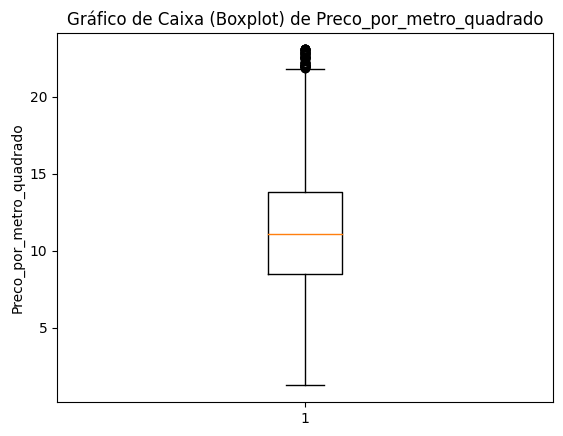

Latitude_imovel
count    6341.00
mean       39.36
std         1.35
min        37.01
25%        38.71
50%        38.75
75%        41.13
max        42.07


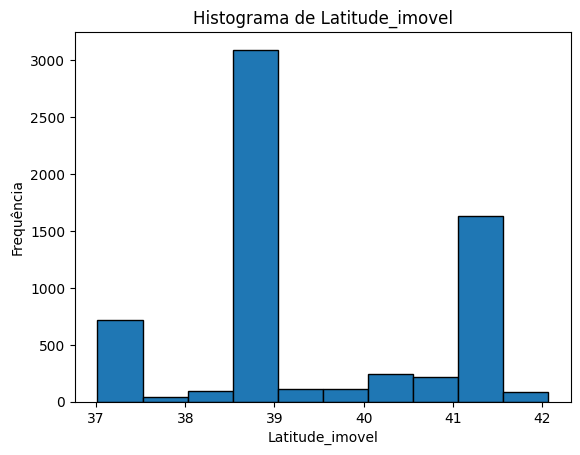

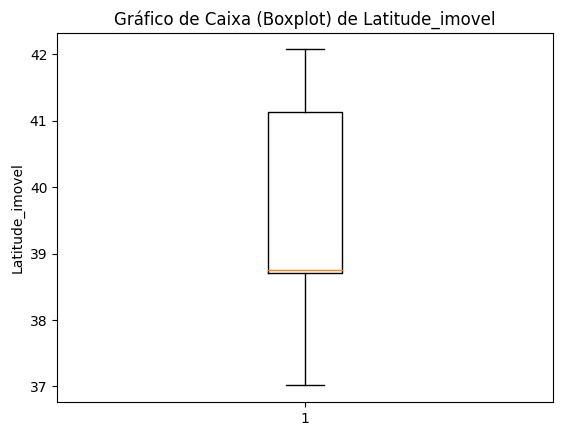

Longitude_imovel
count    6341.00
mean       -8.80
std         0.45
min        -9.44
25%        -9.15
50%        -8.90
75%        -8.61
max        -6.71


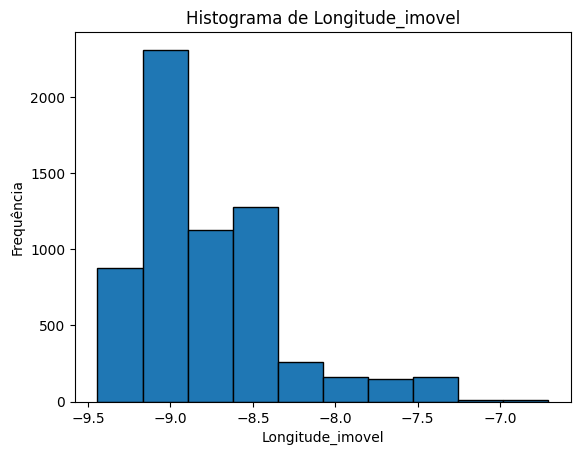

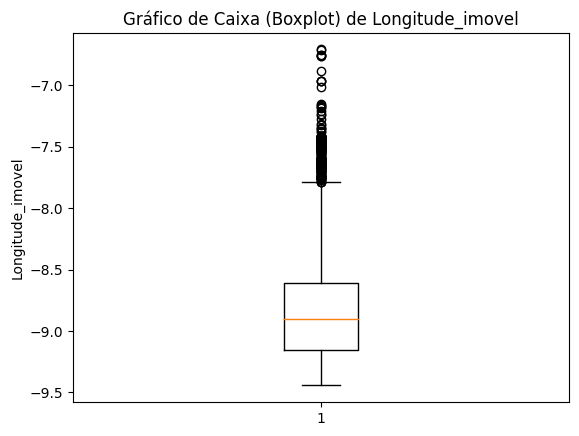

Percentual_Faixa_Etaria_0-14
count    6341.00
mean       15.13
std         1.69
min        11.40
25%        13.20
50%        15.60
75%        16.80
max        16.80


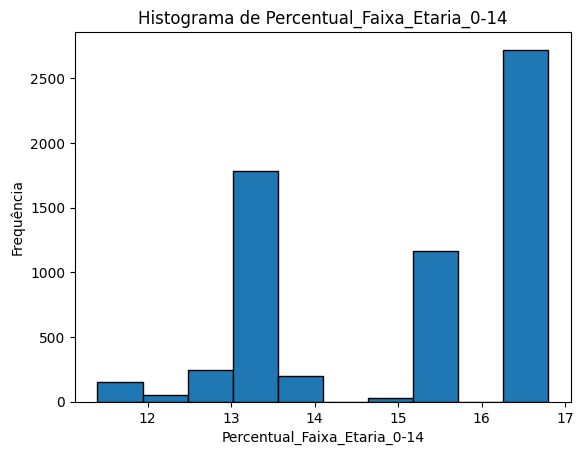

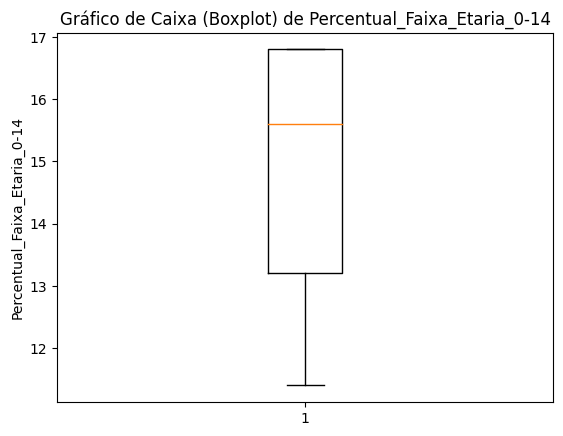

Percentual_Faixa_Etaria_15-64
count    6341.00
mean       58.31
std         3.44
min        55.00
25%        55.00
50%        58.30
75%        62.20
max        66.40


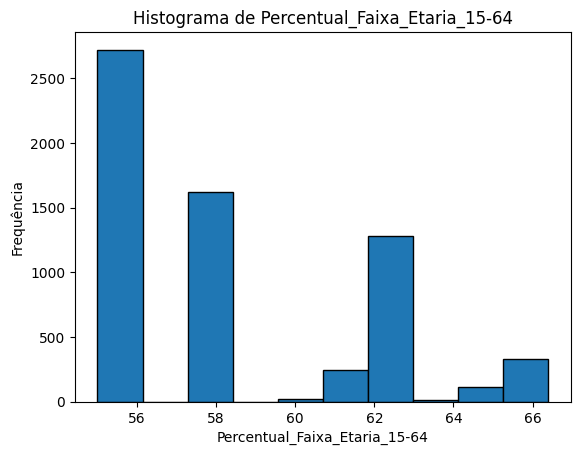

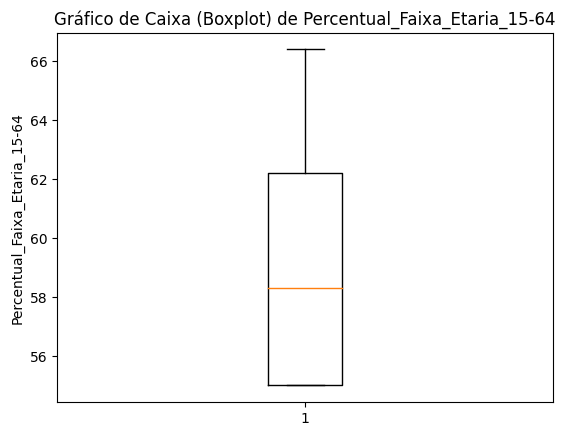

Percentual_Faixa_Etaria_>65
count    6341.00
mean       26.62
std         2.80
min        20.40
25%        23.40
50%        28.30
75%        28.60
max        28.60


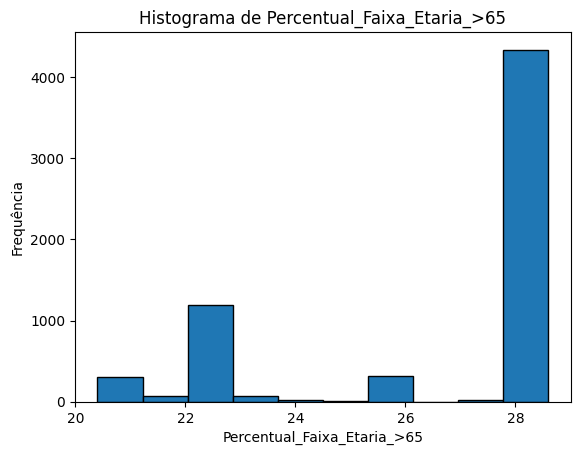

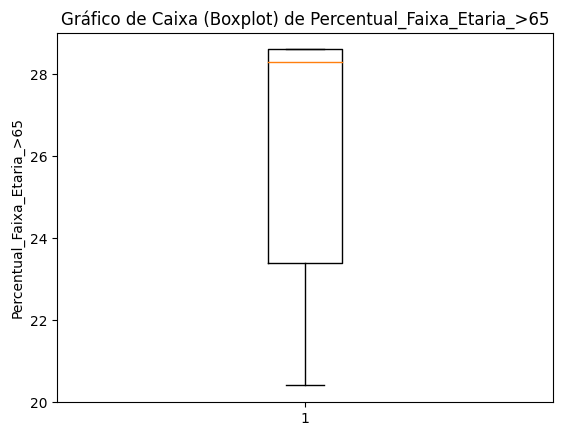

Densidade_populacional_por_Km
count    6341.00
mean     3627.20
std      2240.29
min        28.60
25%       498.00
50%      5093.10
75%      5232.90
max      5232.90


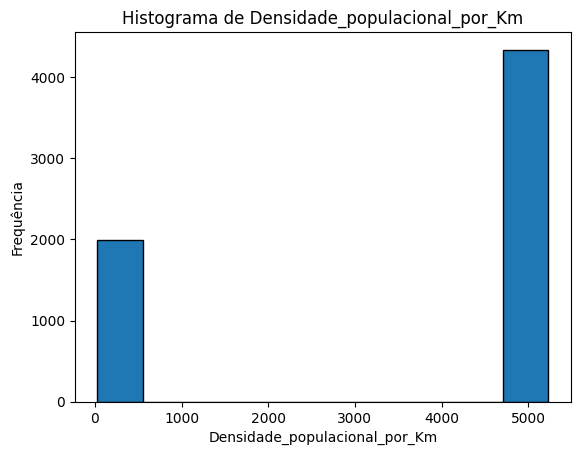

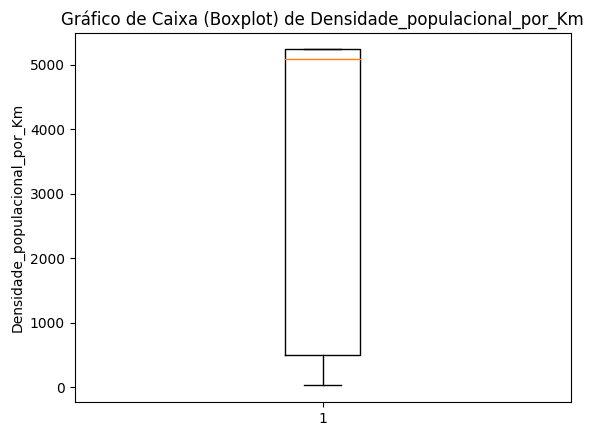

Densidade_populacional_Estrangeiros
count    6341.00
mean       14.00
std         6.66
min         2.00
25%         7.90
50%        15.60
75%        21.00
max        21.00


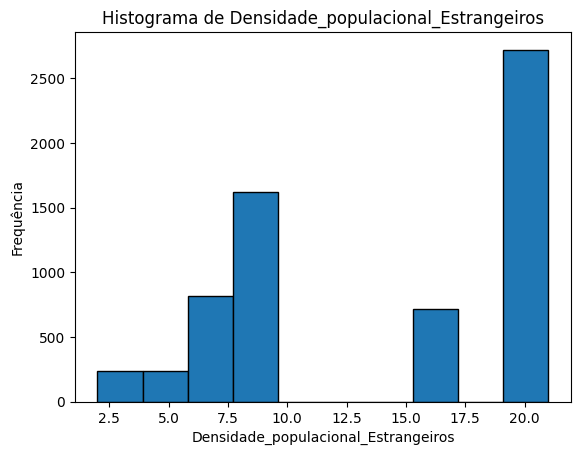

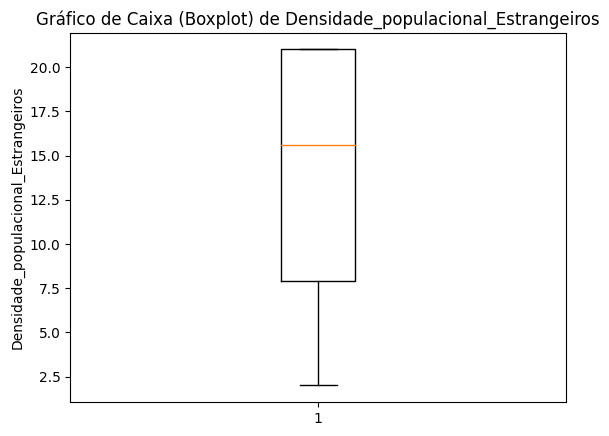

Renda_Media_Mensal
count    6341.00
mean     1445.55
std       218.65
min       991.00
25%      1208.60
50%      1416.70
75%      1669.40
max      1669.40


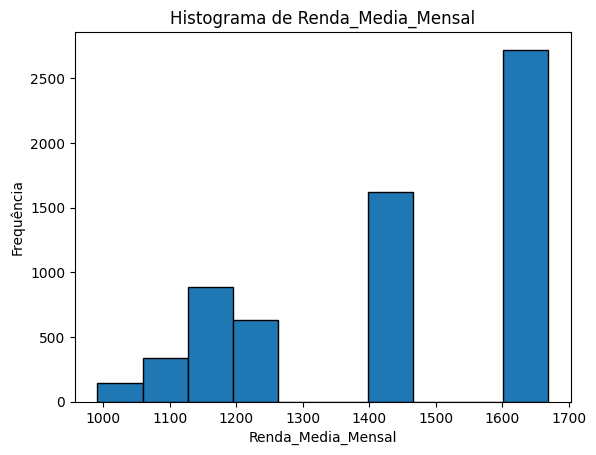

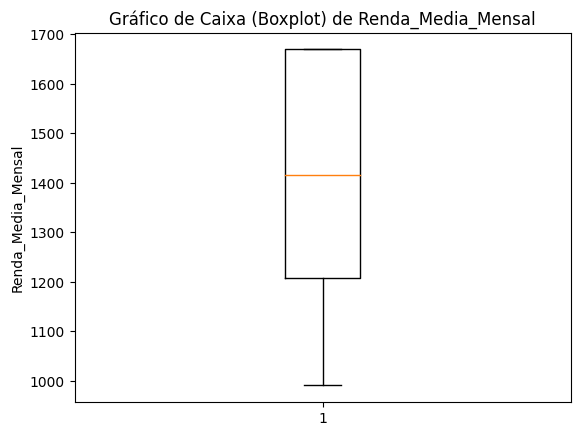

Percentual_Desempregados
count    6341.00
mean        7.29
std         1.36
min         4.00
25%         6.90
50%         7.20
75%         9.20
max         9.20


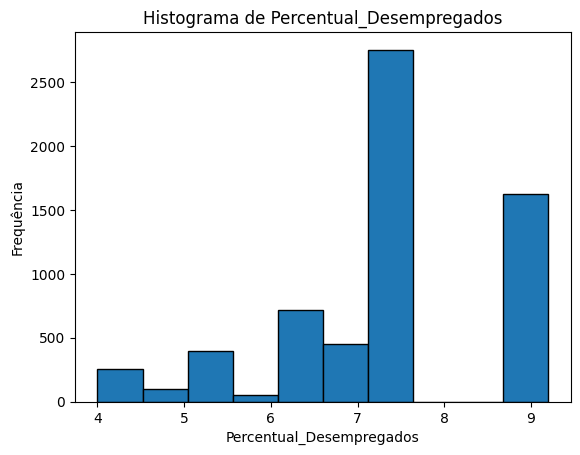

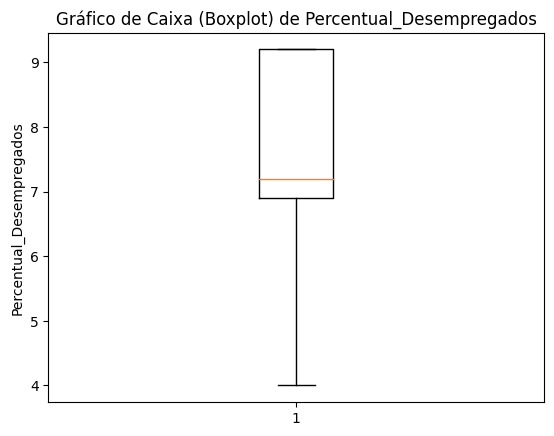

Percentual_Poder_de_Compra
count    6341.00
mean      164.49
std        38.96
min        93.80
25%       130.60
50%       154.00
75%       205.60
max       205.60


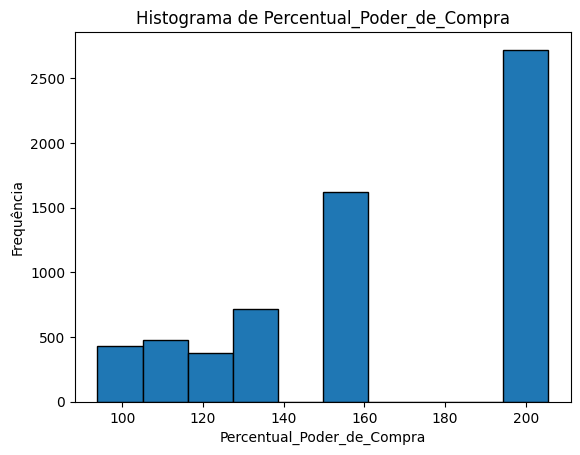

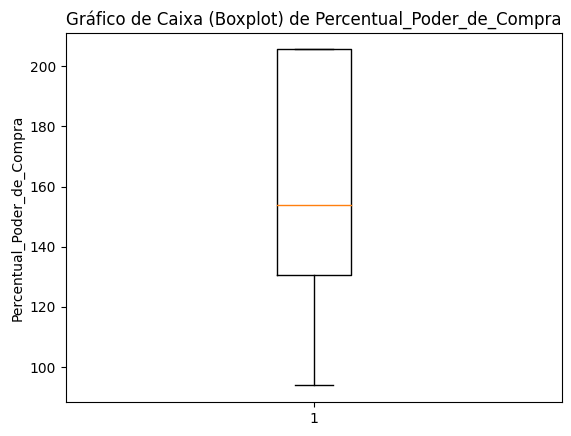

Percentual_Crimes
count    6341.00
mean       46.79
std         9.85
min        20.60
25%        46.90
50%        49.70
75%        56.20
max        56.20


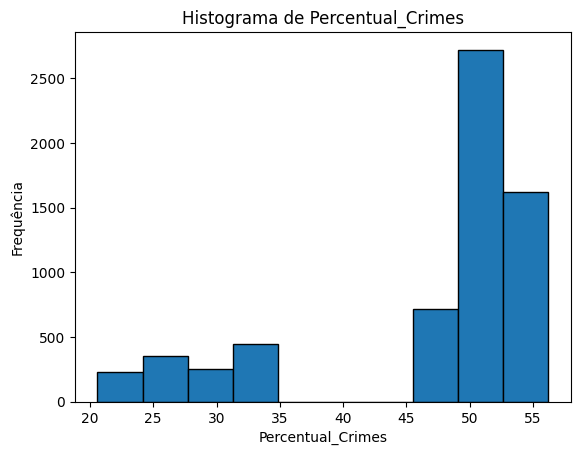

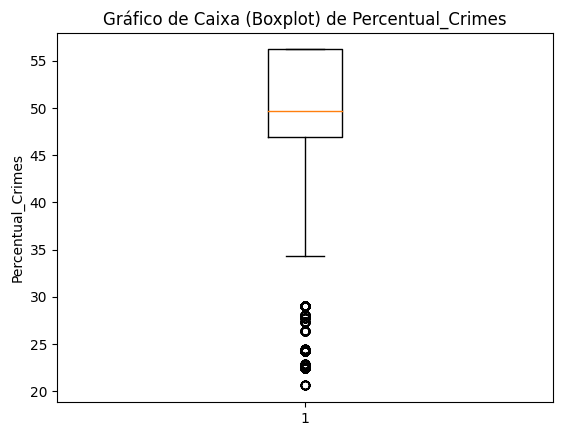

Latitude_Municipio
count    6341.00
mean       39.33
std         1.37
min        37.02
25%        38.71
50%        38.71
75%        41.15
max        41.88


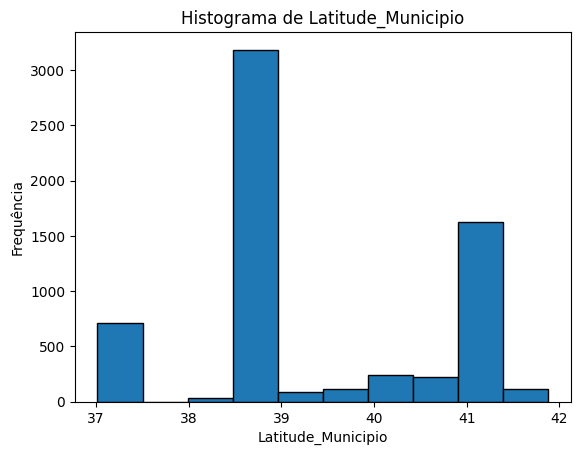

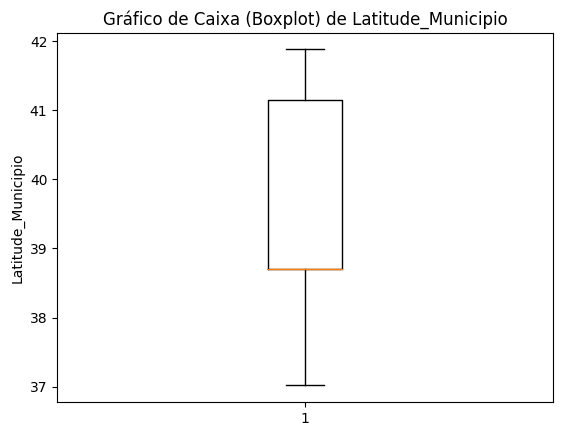

Longitude_Municipio
count    6341.00
mean       -8.75
std         0.44
min        -9.14
25%        -9.14
50%        -8.81
75%        -8.61
max        -6.77


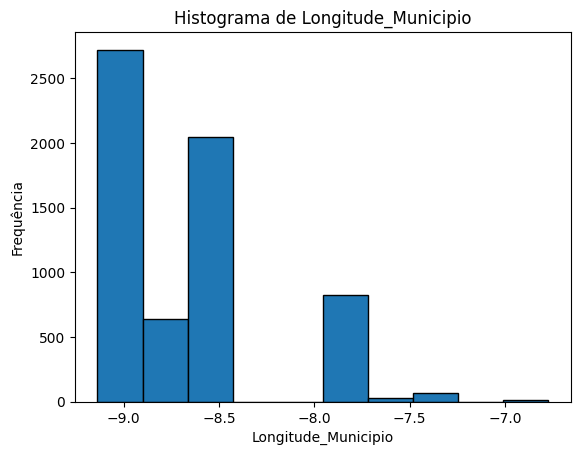

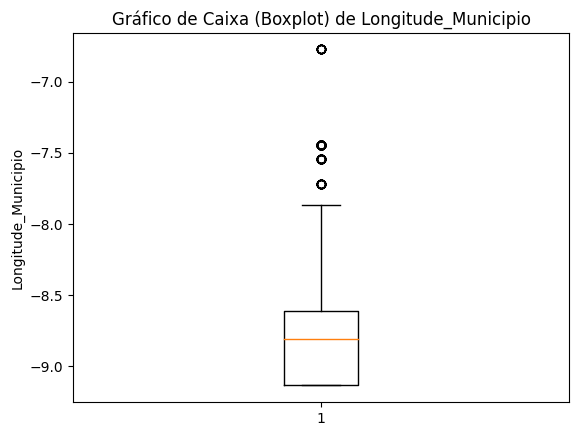

Distancia_dirigindo_de_Lisboa_Portugal
count    6341.00
mean      122.18
std       124.26
min         0.00
25%         0.00
50%        70.50
75%       274.80
max       370.50


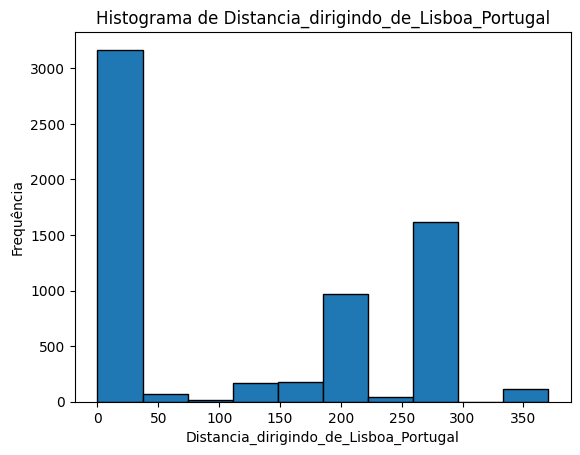

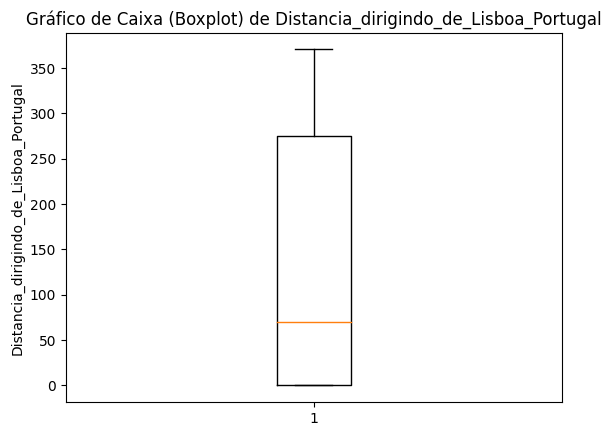

Distancia_dirigindo_de_Porto_Portugal
count    6341.00
mean      207.75
std       149.27
min         0.00
25%         0.00
50%       274.80
75%       274.80
max       462.60


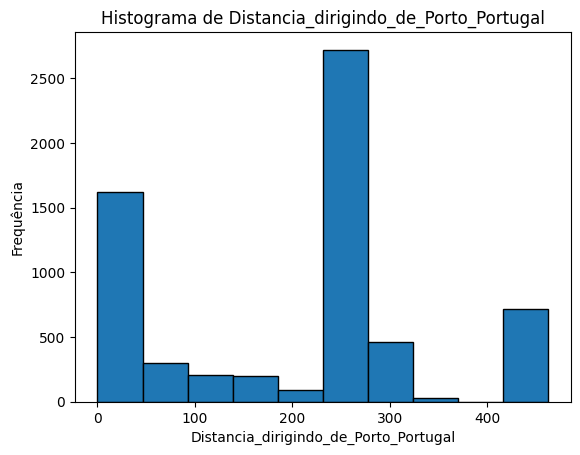

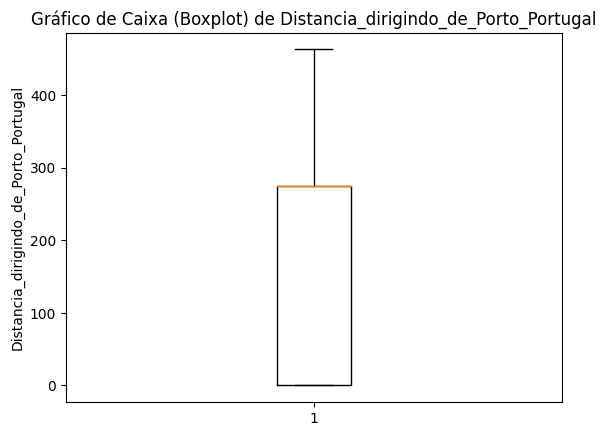

In [77]:
# Analise exploratorio variaveis numericas 
exploratory_analysis(df_final, number_vars)


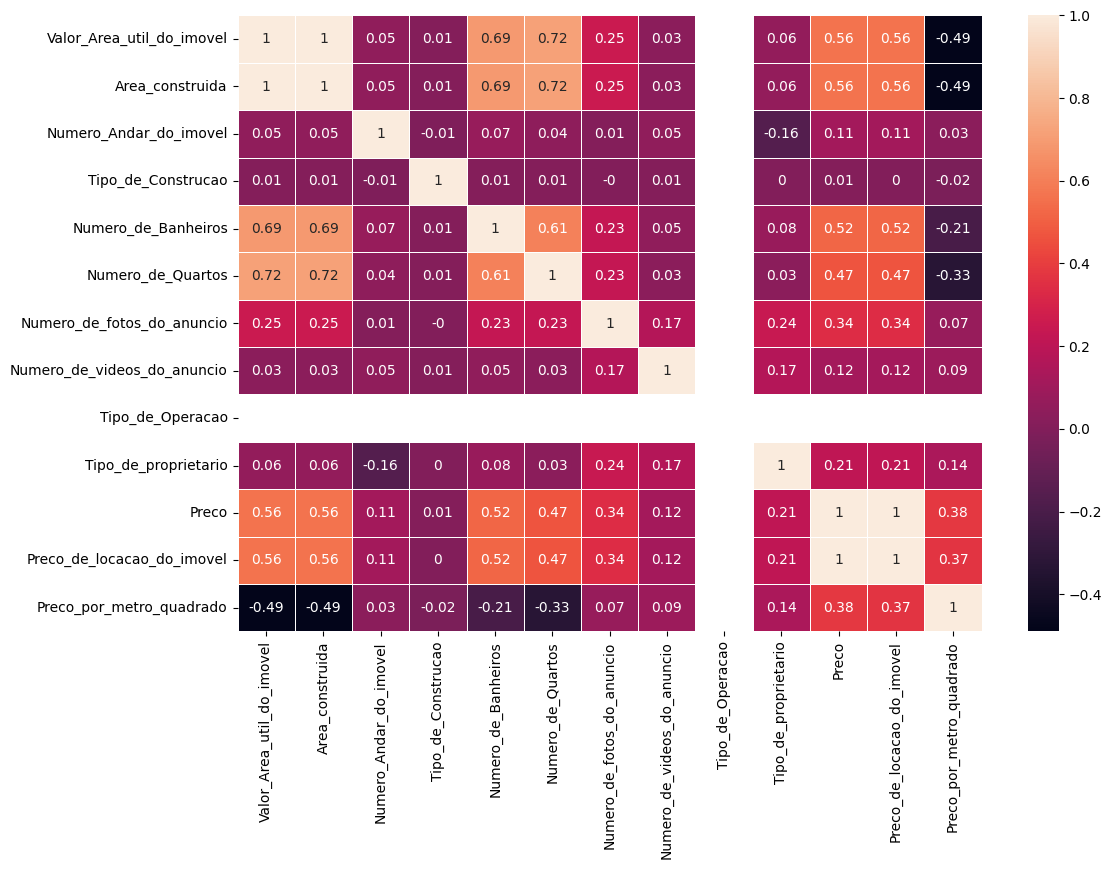

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcule a correlação linear
number_vars2 = ['Valor_Area_util_do_imovel','Area_construida','Numero_Andar_do_imovel','Tipo_de_Construcao',
            'Numero_de_Banheiros','Numero_de_Quartos','Numero_de_fotos_do_anuncio','Numero_de_videos_do_anuncio',
           'Tipo_de_Operacao','Tipo_de_proprietario','Preco','Preco_de_locacao_do_imovel','Preco_por_metro_quadrado']

df_numerico = df_final.filter(items=number_vars2)
correlation_matrix = df_numerico.corr()

plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, linewidths=.5);

# Identifique as correlações fortes (maiores que 0.9 ou menores que -0.9)
high_correlation = correlation_matrix[(correlation_matrix > 0.9) | (correlation_matrix < -0.9)]






In [80]:
correlation_matrix

Valor_Area_util_do_imovel  Area_construida  \
Valor_Area_util_do_imovel                     1.000000         0.999428   
Area_construida                               0.999428         1.000000   
Numero_Andar_do_imovel                        0.047874         0.047769   
Tipo_de_Construcao                            0.006729         0.006795   
Numero_de_Banheiros                           0.686585         0.686987   
Numero_de_Quartos                             0.723556         0.723816   
Numero_de_fotos_do_anuncio                    0.245976         0.246850   
Numero_de_videos_do_anuncio                   0.026038         0.026152   
Tipo_de_Operacao                                   NaN              NaN   
Tipo_de_proprietario                          0.058709         0.059014   
Preco                                         0.557276         0.557638   
Preco_de_locacao_do_imovel                    0.558163         0.558672   
Preco_por_metro_quadrado                     -0.486339        -0.485387   

                             Numero_Andar_do_imovel  Tipo_de_Construcao  \
Valor_Area_util_do_imovel                  0.047874            0.006729   
Area_construida                            0.047769            0.006795   
Numero_Andar_do_imovel                     1.000000           -0.014760   
Tipo_de_Construcao                        -0.014760            1.000000   
Numero_de_Banheiros                        0.071132            0.014697   
Numero_de_Quartos                          0.042033            0.008459   
Numero_de_fotos_do_anuncio                 0.014385           -0.004284   
Numero_de_videos_do_anuncio                0.054502            0.010130   
Tipo_de_Operacao                                NaN                 NaN   
Tipo_de_proprietario                      -0.161651            0.002942   
Preco                                      0.112208            0.006049   
Preco_de_locacao_do_imovel                 0.113033            0.004753   
Preco_por_metro_quadrado                   0.033678           -0.016469   

                             Numero_de_Banheiros  Numero_de_Quartos  \
Valor_Area_util_do_imovel               0.686585           0.723556   
Area_construida                         0.686987           0.723816   
Numero_Andar_do_imovel                  0.071132           0.042033   
Tipo_de_Construcao                      0.014697           0.008459   
Numero_de_Banheiros                     1.000000           0.607813   
Numero_de_Quartos                       0.607813           1.000000   
Numero_de_fotos_do_anuncio              0.226744           0.228142   
Numero_de_videos_do_anuncio             0.050034           0.028672   
Tipo_de_Operacao                             NaN                NaN   
Tipo_de_proprietario                    0.076405           0.029049   
Preco                                   0.519890           0.467946   
Preco_de_locacao_do_imovel              0.520701           0.467441   
Preco_por_metro_quadrado               -0.208199          -0.328093   

                             Numero_de_fotos_do_anuncio  \
Valor_Area_util_do_imovel                      0.245976   
Area_construida                                0.246850   
Numero_Andar_do_imovel                         0.014385   
Tipo_de_Construcao                            -0.004284   
Numero_de_Banheiros                            0.226744   
Numero_de_Quartos                              0.228142   
Numero_de_fotos_do_anuncio                     1.000000   
Numero_de_videos_do_anuncio                    0.173263   
Tipo_de_Operacao                                    NaN   
Tipo_de_proprietario                           0.242793   
Preco                                          0.337562   
Preco_de_locacao_do_imovel                     0.336743   
Preco_por_metro_quadrado                       0.067303   

                             Numero_de_videos_do_anuncio  Tipo_de_Operacao  \
Valor_Area_util_do_imovel  

In [81]:
# Exiba as variáveis com alta correlação
variables_with_high_correlation = high_correlation.stack().index.tolist()
print("Variáveis com alta correlação:")
for variables in variables_with_high_correlation:
    print(variables)


Variáveis com alta correlação:
('Valor_Area_util_do_imovel', 'Valor_Area_util_do_imovel')
('Valor_Area_util_do_imovel', 'Area_construida')
('Area_construida', 'Valor_Area_util_do_imovel')
('Area_construida', 'Area_construida')
('Numero_Andar_do_imovel', 'Numero_Andar_do_imovel')
('Tipo_de_Construcao', 'Tipo_de_Construcao')
('Numero_de_Banheiros', 'Numero_de_Banheiros')
('Numero_de_Quartos', 'Numero_de_Quartos')
('Numero_de_fotos_do_anuncio', 'Numero_de_fotos_do_anuncio')
('Numero_de_videos_do_anuncio', 'Numero_de_videos_do_anuncio')
('Tipo_de_proprietario', 'Tipo_de_proprietario')
('Preco', 'Preco')
('Preco', 'Preco_de_locacao_do_imovel')
('Preco_de_locacao_do_imovel', 'Preco')
('Preco_de_locacao_do_imovel', 'Preco_de_locacao_do_imovel')
('Preco_por_metro_quadrado', 'Preco_por_metro_quadrado')


In [82]:
# - Tipo_de_Preferencia_de_contato_com_o_proprietario e Tipo_de_Origem_do_anuncio serão excluida por não representar influencia 
#   sobre o preço do arrendamento
df_final = df_final.drop(columns=['Quantidade_de_Quartos','Area_construida','Tipo_de_Preferencia_de_contato_com_o_proprietario',
                                 'Tipo_de_Origem_do_anuncio'])

In [84]:
df_final.columns

Index(['RowId', 'Id_do_imovel', 'Nome_do_imovel', 'Preco',
       'Valor_Area_util_do_imovel', 'Numero_Andar_do_imovel',
       'Indicador_de_Elevador', 'Detalhes', 'Status_do_anuncio',
       'Distrito_do_imovel', 'Preco_por_metro_quadrado', 'Caracteristicas',
       'Comentarios_adicionados', 'Endereco', 'Latitude_imovel',
       'Longitude_imovel', 'Tipo_de_Construcao', 'Numero_de_Banheiros',
       'Possui_Jardim', 'Possui_Elevador', 'Possui_Estacionamento',
       'Possui_Piscina', 'Possui_Terraco', 'Numero_de_Quartos',
       'Tipo_de_Certificacao_Energetica', 'Id_do_anuncio',
       'Indicador_Anuncio_possui_planta_baixa', 'Numero_de_fotos_do_anuncio',
       'Numero_de_videos_do_anuncio', 'Tipo_de_Operacao',
       'Tipo_de_proprietario', 'Preco_de_locacao_do_imovel', 'ad_typology',
       'Ambito_Geografico', 'Nome_Regiao', 'Nome_Cidade',
       'Numero_Faixa_Etaria_0-14', 'Numero_Faixa_Etaria_15-64',
       'Numero_Faixa_Etaria_>65', 'Percentual_Faixa_Etaria_0-14',
       'Pe

In [85]:
# remove outros campos
df_final.drop(['Nome_do_imovel','Status_do_anuncio','Caracteristicas',
               'Comentarios_adicionados','Endereco','Id_do_anuncio','ad_typology','Ambito_Geografico','Detalhes', 
               'Preco_de_locacao_do_imovel'], axis=1, inplace=True)

In [86]:
#Revisar Variaveis 'Preco_por_metro_quadrado' e 'Preco' e 'Preco_do_Imovel'
# verificar se na analise de correlação preciso incluir a variavel target

# - verificar o tipo de operação
# - verificar o ad_topology
df_final[['Tipo_de_Operacao','ad_typology']]


KeyError: "['ad_typology'] not in index"

In [87]:
!pip install folium
!pip install geopandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
df_final['Latitude_imovel'] = df_final['Latitude_imovel'].str.replace(',', '.').astype(float)


AttributeError: Can only use .str accessor with string values!

In [89]:
import folium
from folium.plugins import HeatMap


# Crie um mapa centrado na média da latitude e longitude
mapa = folium.Map(location=[df_final['Latitude_imovel'].mean(), df_final['Longitude_imovel'].mean()], zoom_start=10)

# Crie uma lista de pontos de dados, onde cada ponto é uma lista: [latitude, longitude, valor_metro_quadrado]
data = df_final[['Latitude_imovel', 'Longitude_imovel', 'Preco']].values.tolist()

# Crie o mapa de calor e adicione ao mapa
HeatMap(data).add_to(mapa)

# Exibe o mapa
mapa


<Axes: >

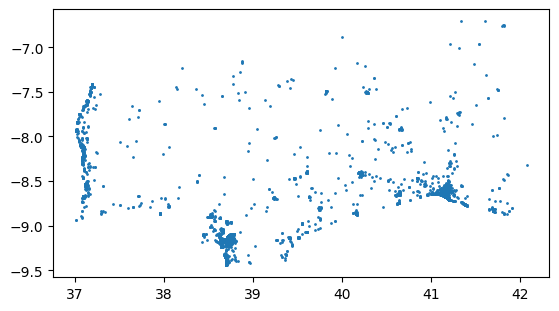

In [90]:
import geopandas as gpd
from shapely.geometry import Point

# Crie uma nova coluna 'geometry' que contém objetos Point criados a partir das colunas de latitude e longitude
df_final['geometry'] = df_final.apply(lambda row: Point(row['Latitude_imovel'], row['Longitude_imovel']), axis=1)

# Crie um GeoDataFrame a partir do DataFrame
gdf = gpd.GeoDataFrame(df_final, geometry='geometry')

# Plotar o GeoDataFrame
gdf.plot(markersize=1)


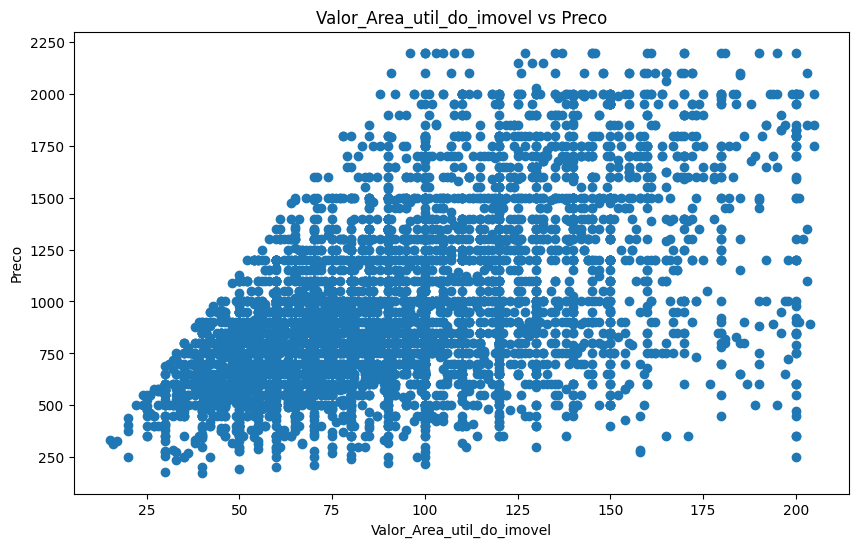

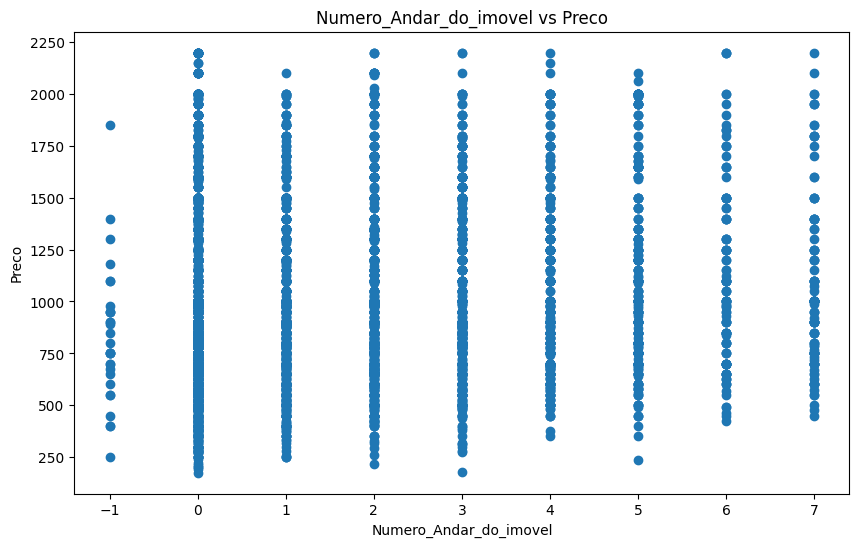

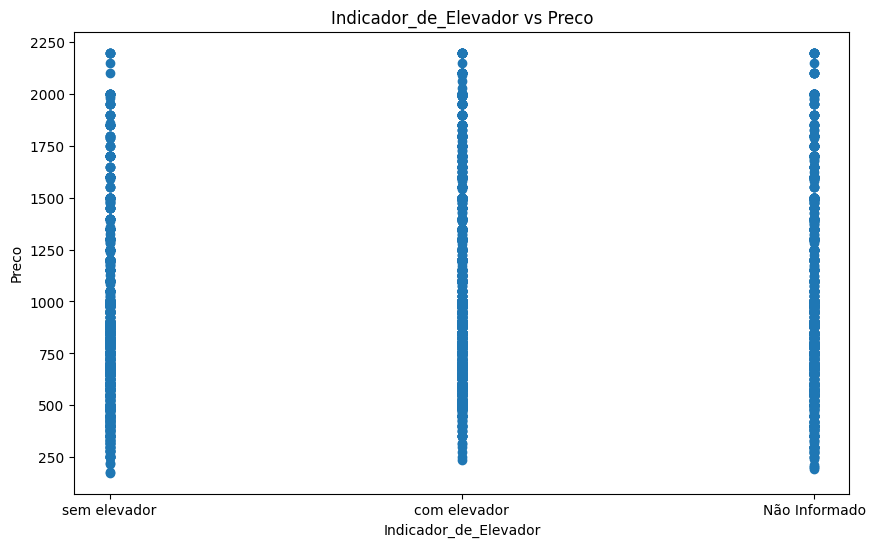

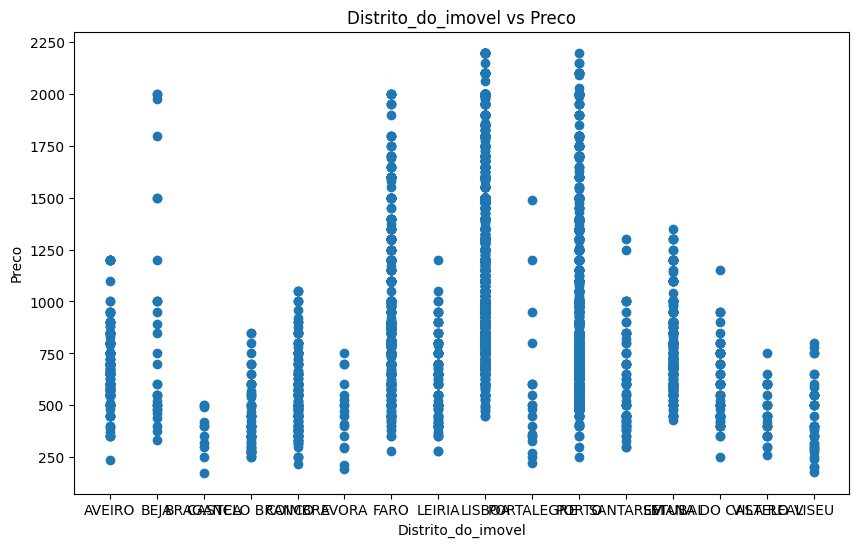

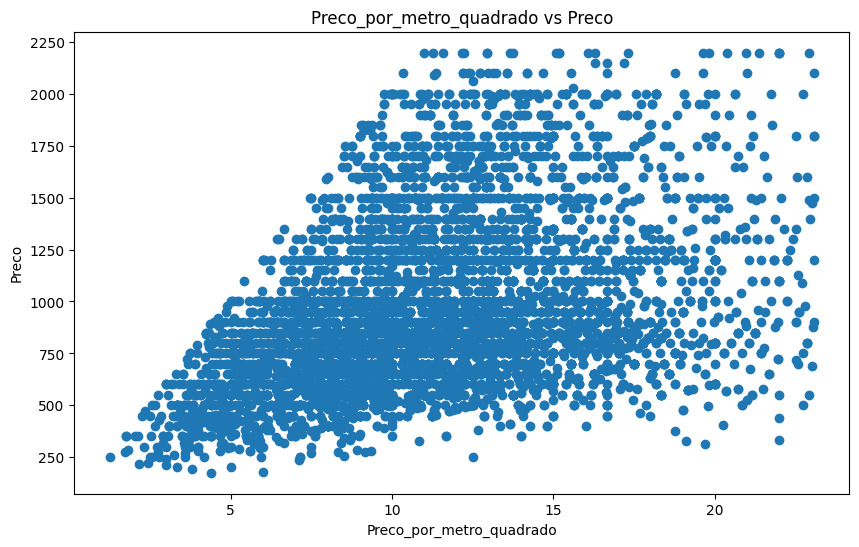

KeyError: 'Comentarios_adicionados'

<Figure size 1000x600 with 0 Axes>

In [95]:
#import pandas as pd
#import matplotlib.pyplot as plt

def analyze_bivariate(data, variables, target):
    for variable in variables:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[variable], data[target])
        plt.xlabel(variable)
        plt.ylabel(target)
        plt.title(f'{variable} vs {target}')
        plt.show()

        

        
# Lista de variáveis
variables = ['Valor_Area_util_do_imovel', 'Numero_Andar_do_imovel',
             'Indicador_de_Elevador',
             'Distrito_do_imovel', 'Preco_por_metro_quadrado',
             'Comentarios_adicionados', 'Endereco', 'Latitude_imovel',
             'Longitude_imovel', 'Tipo_de_Construcao', 'Numero_de_Banheiros',
             'Possui_Jardim', 'Possui_Elevador', 'Possui_Estacionamento',
             'Possui_Piscina', 'Possui_Terraco', 'Numero_de_Quartos',
             'Tipo_de_Certificacao_Energetica', 'Id_do_anuncio',
             'Indicador_Anuncio_possui_planta_baixa', 'Numero_de_fotos_do_anuncio',
             'Numero_de_videos_do_anuncio', 'Tipo_de_Operacao',
             'Tipo_de_proprietario']

# Variável alvo
target = 'Preco'

# Realizar a análise bivariada
analyze_bivariate(df_final, variables, target)


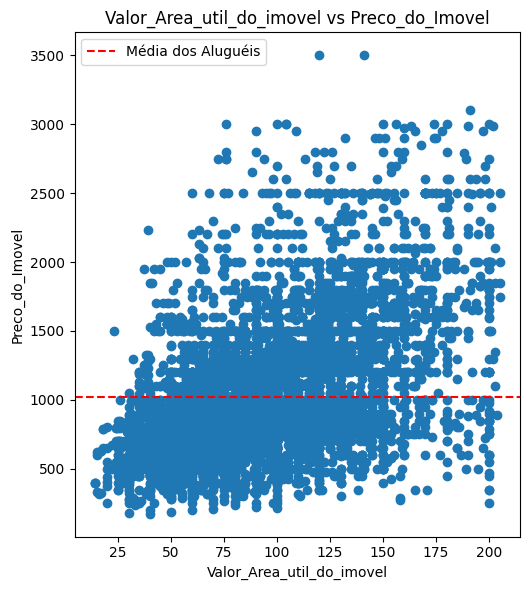

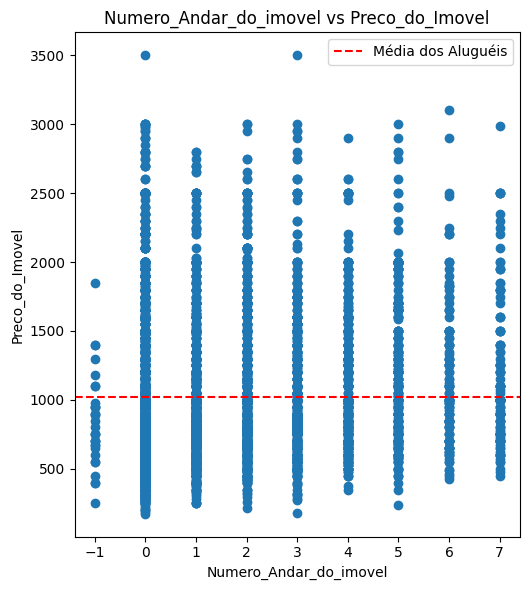

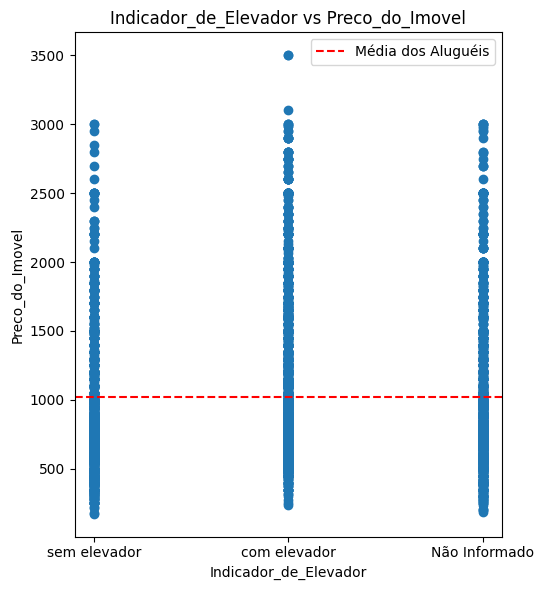

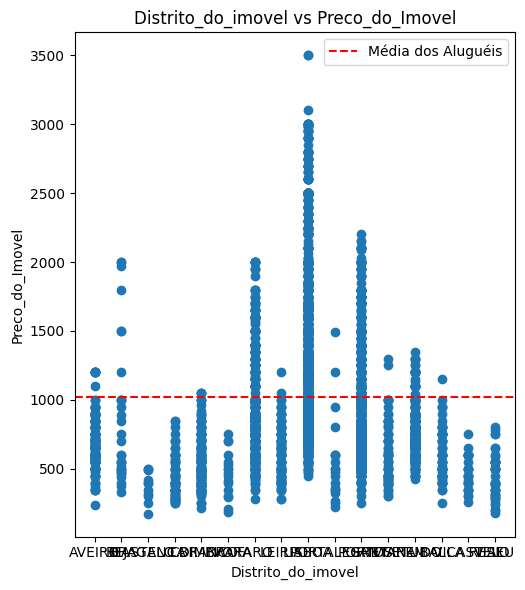

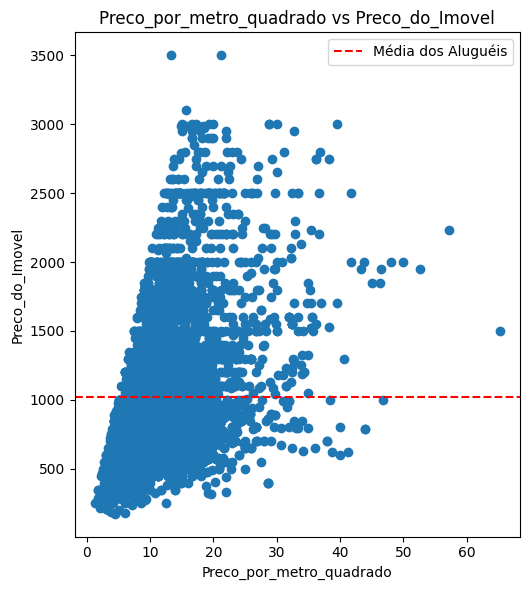

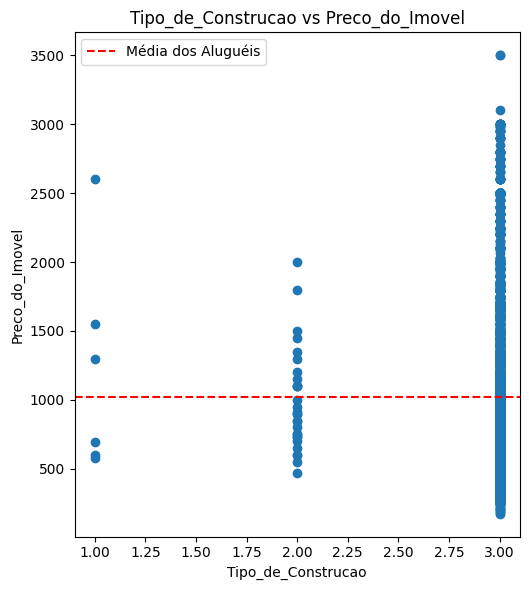

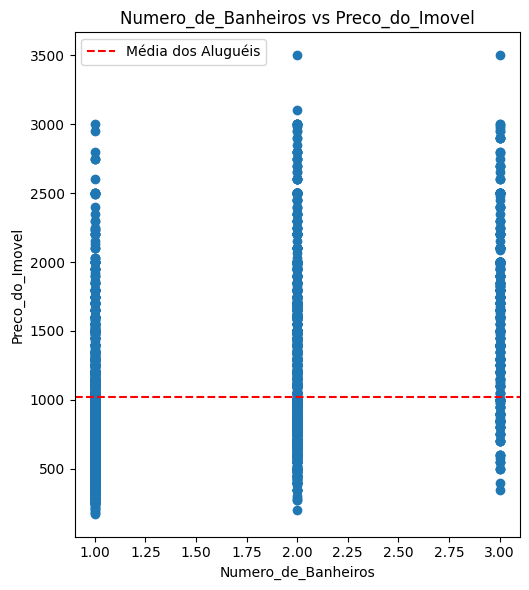

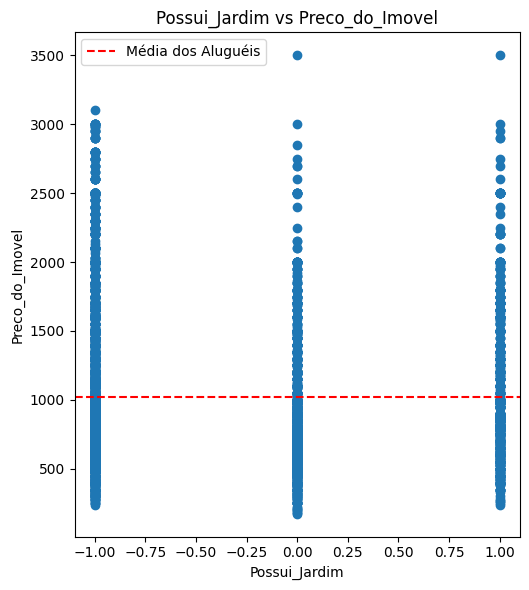

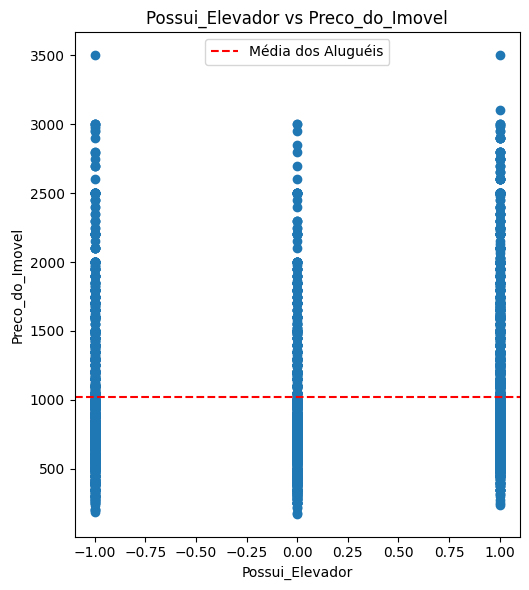

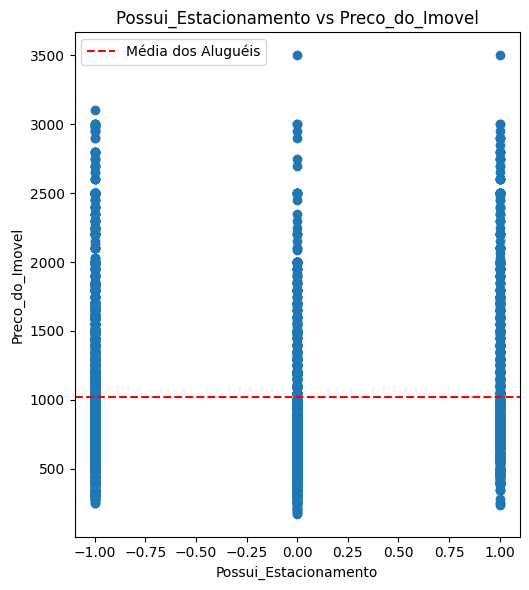

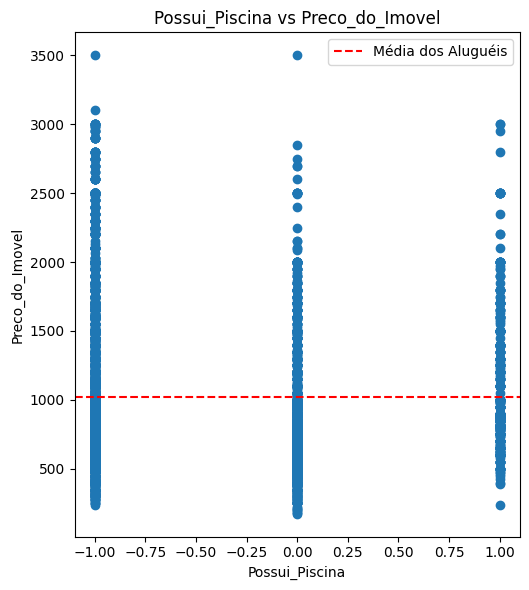

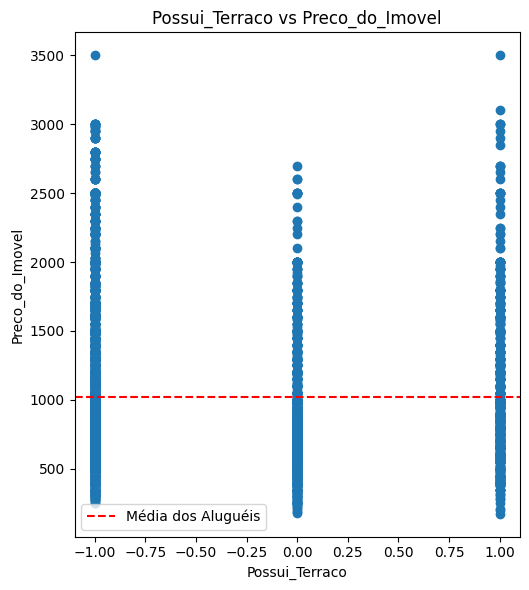

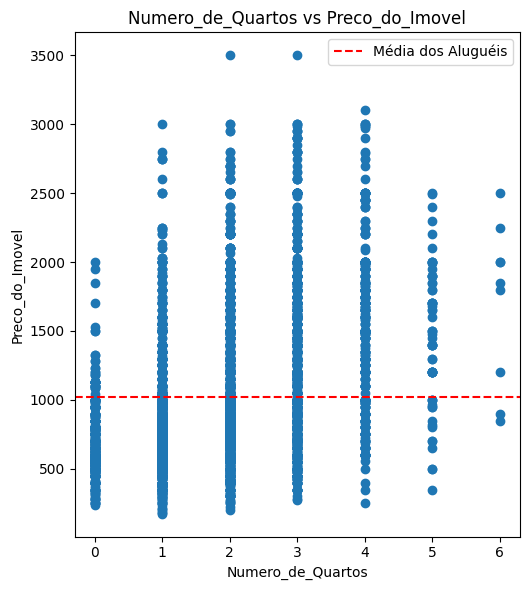

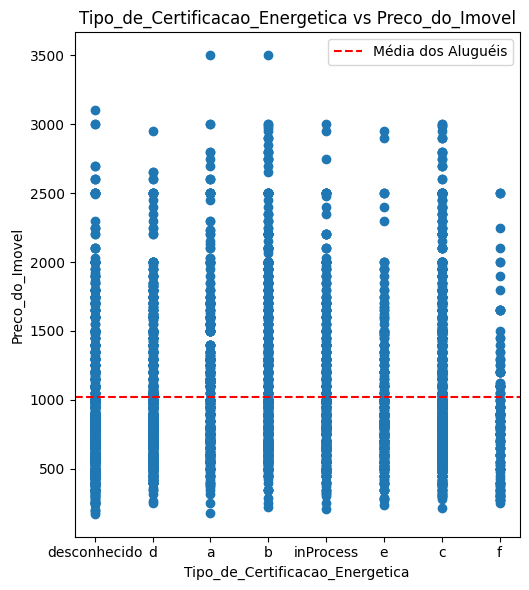

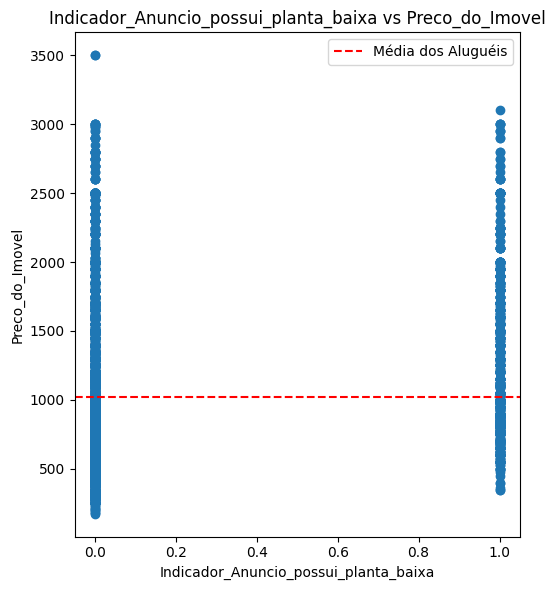

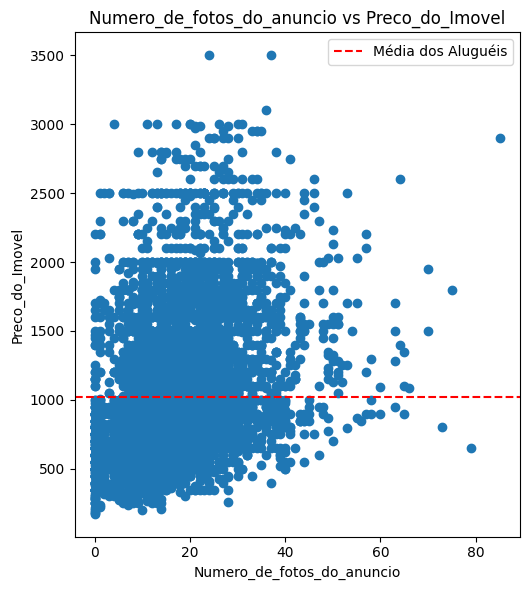

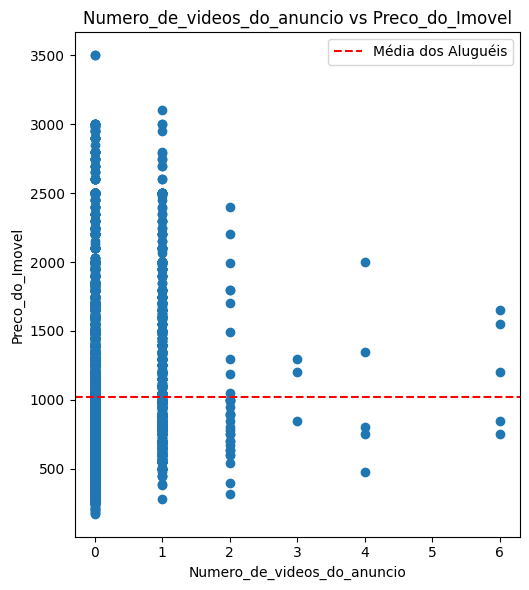

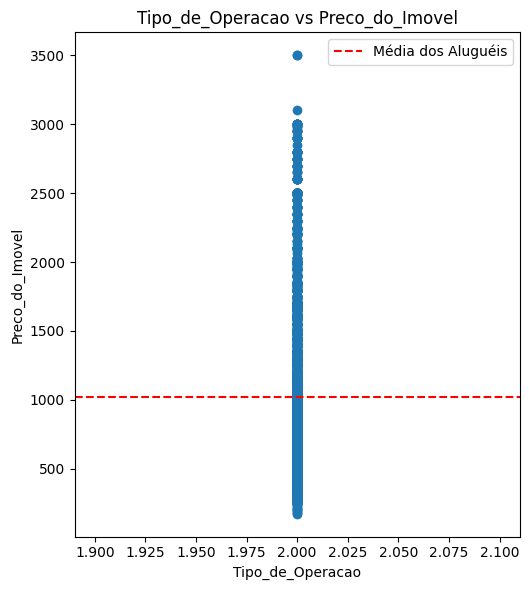

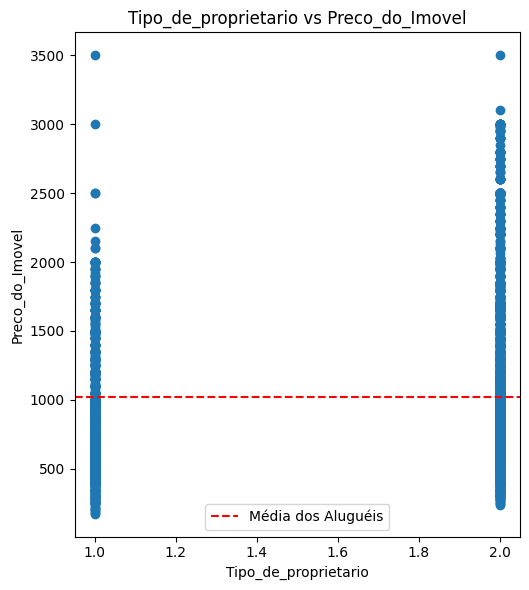

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_bivariate(data, variables, target):
    mean_target = data[target].mean()

    for variable in variables:
        grouped_data = data.groupby(variable)[target].mean()
        plt.figure(figsize=(10, 6))

        # Gráfico de dispersão
        plt.subplot(1, 2, 2)
        plt.scatter(data[variable], data[target])
        plt.axhline(y=mean_target, color='red', linestyle='--', label='Média dos Aluguéis')
        plt.xlabel(variable)
        plt.ylabel(target)
        plt.title(f'{variable} vs {target}')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Lista de variáveis
variables = ['Valor_Area_util_do_imovel', 'Numero_Andar_do_imovel',
             'Indicador_de_Elevador',
             'Distrito_do_imovel', 'Preco_por_metro_quadrado','Tipo_de_Construcao', 'Numero_de_Banheiros',
             'Possui_Jardim', 'Possui_Elevador', 'Possui_Estacionamento',
             'Possui_Piscina', 'Possui_Terraco', 'Numero_de_Quartos',
             'Tipo_de_Certificacao_Energetica',
             'Indicador_Anuncio_possui_planta_baixa', 'Numero_de_fotos_do_anuncio',
             'Numero_de_videos_do_anuncio', 'Tipo_de_Operacao',
             'Tipo_de_proprietario']

# Variável alvo
target = 'Preco'

# Realizar a análise bivariada comparando com a média dos preços de alugueis
analyze_bivariate(df_final, variables, target)


In [96]:
# Ranking Arrendamento por Distrito
data = df_final
def ranking_precos(data,variables):
    for variable in variables:
        # Criar um DataFrame com a média do preço de aluguel por distrito
        mean_rent_price_by_district = round(data.groupby(variable)['Preco'].mean()).reset_index()
        mean_rent_price_by_district = mean_rent_price_by_district.sort_values(by='Preco', ascending=False)

        # Plotar o gráfico de barras com a média de preço de aluguel por distrito
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(x='Preco', y=variable, data=mean_rent_price_by_district, palette='viridis')
        plt.xlabel('Média do Preço de Aluguel')
        plt.ylabel(variable)
        plt.title(f'Ranking de {variable} por Média do Preço de Aluguel')

        # Obter o valor máximo no eixo x
        max_x = mean_rent_price_by_district['Preco'].max()

        plt.tight_layout()
        plt.show()


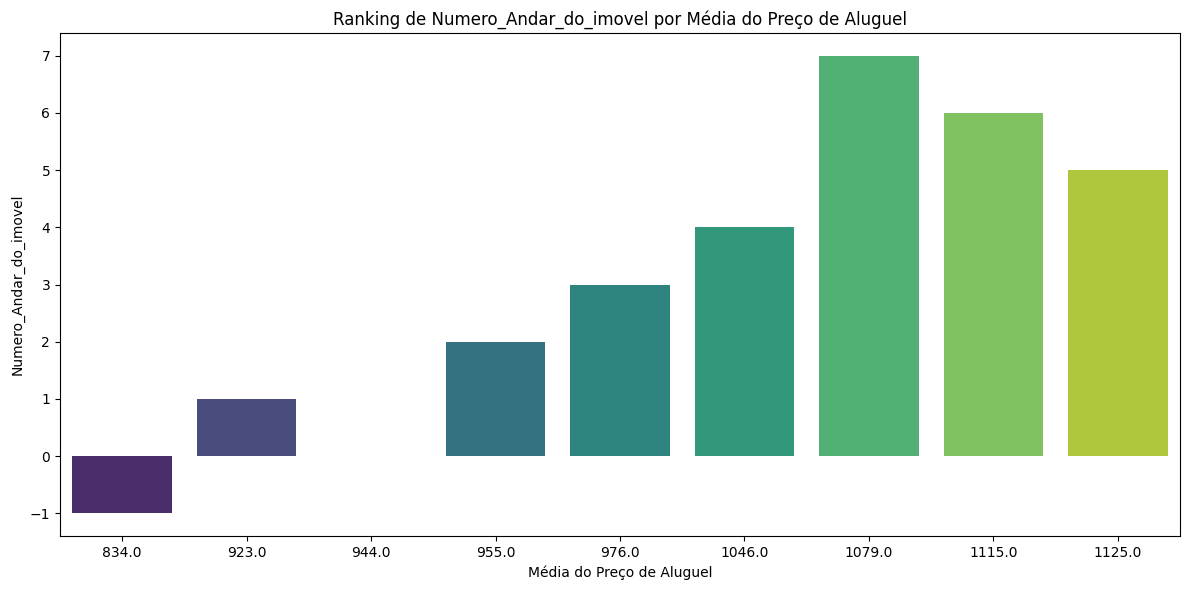

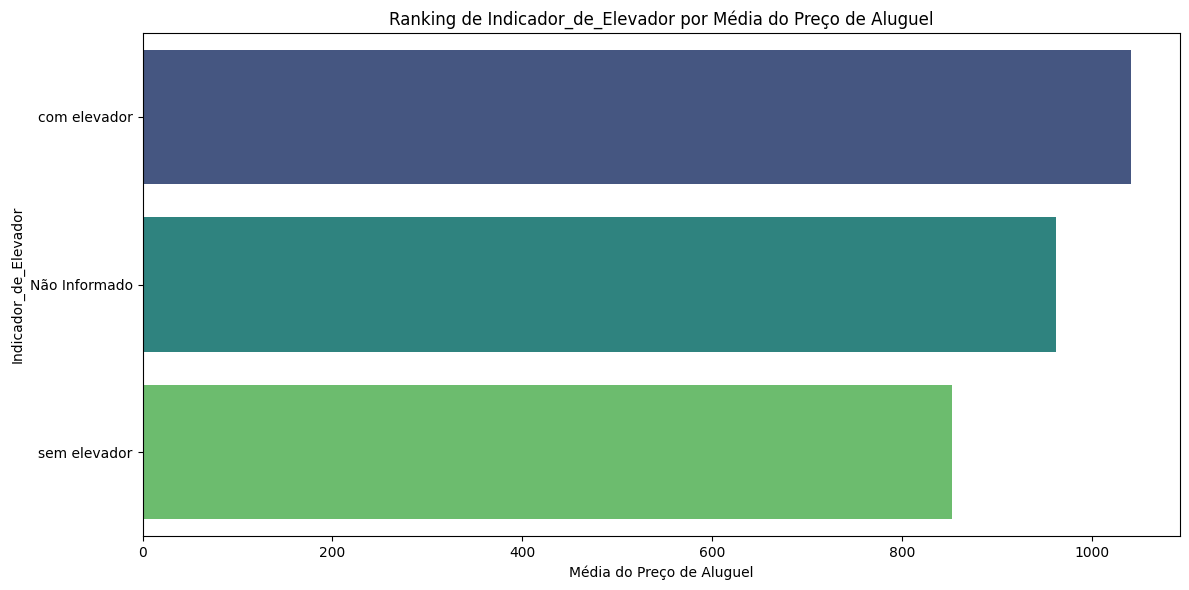

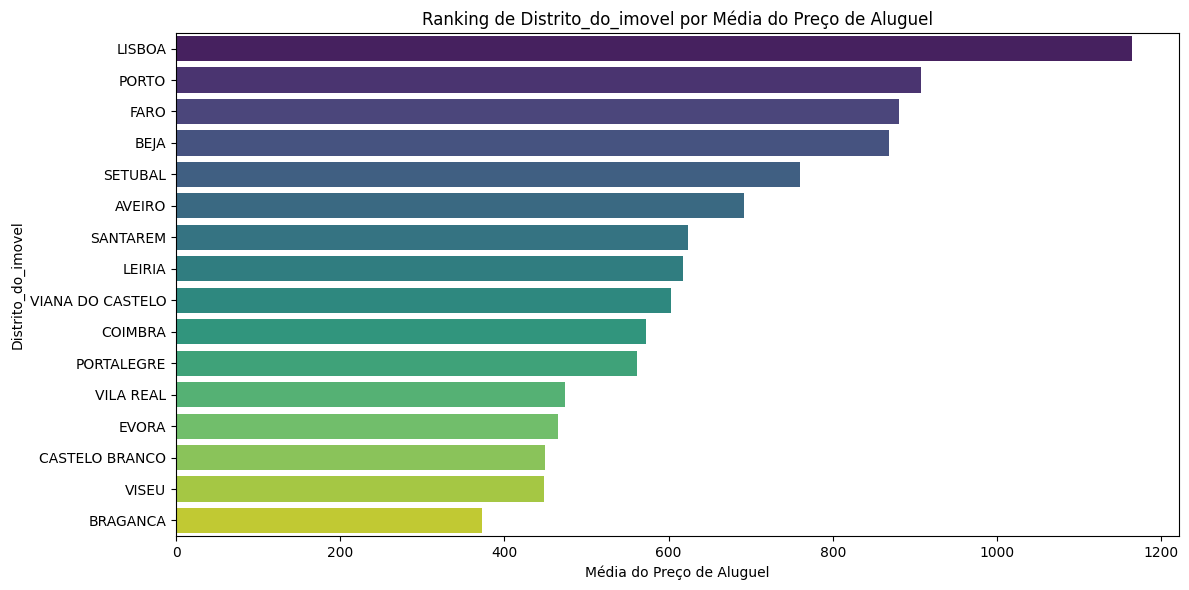

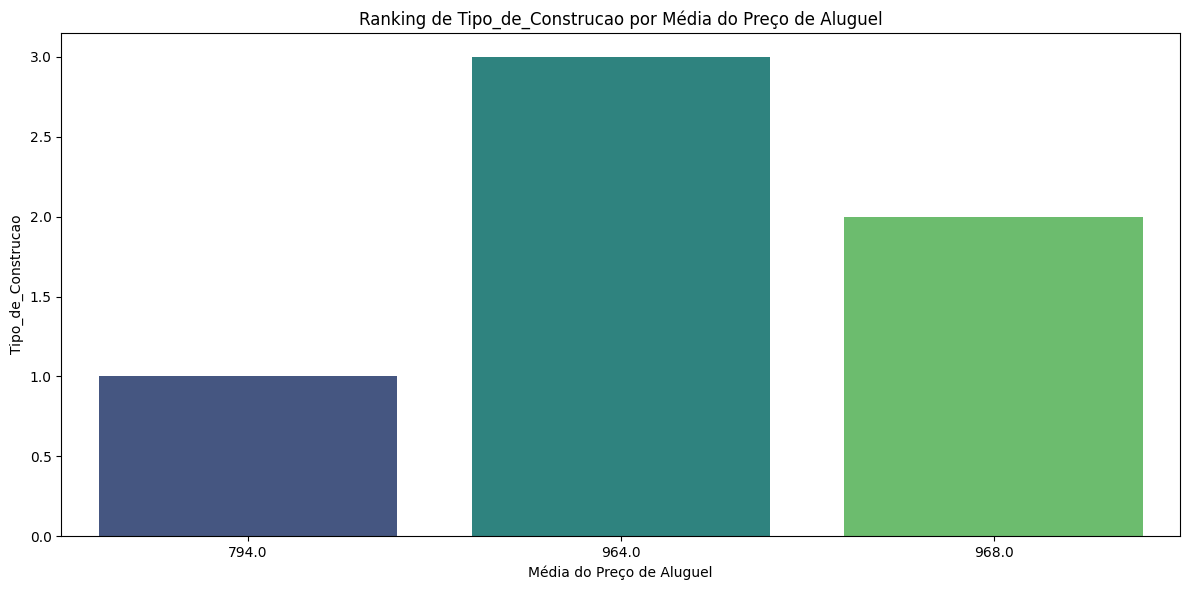

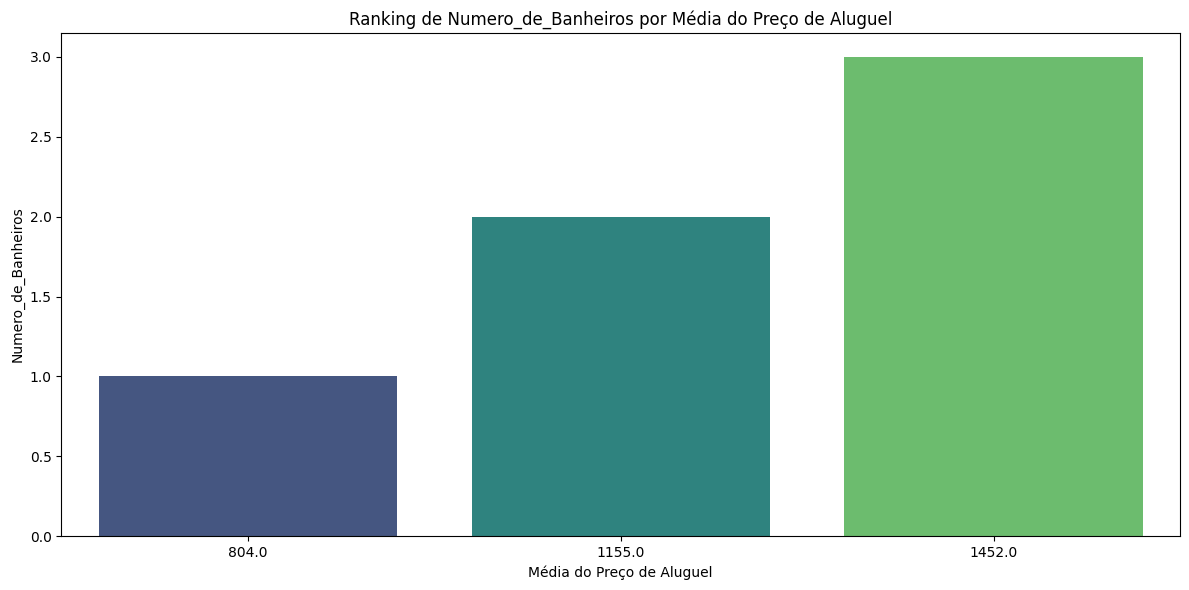

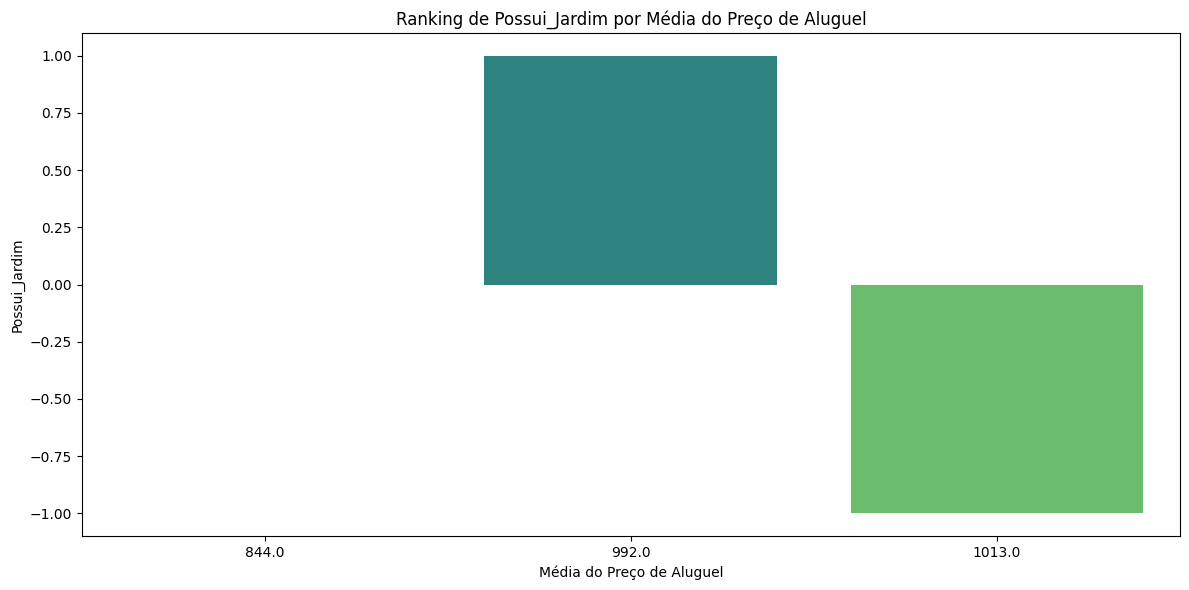

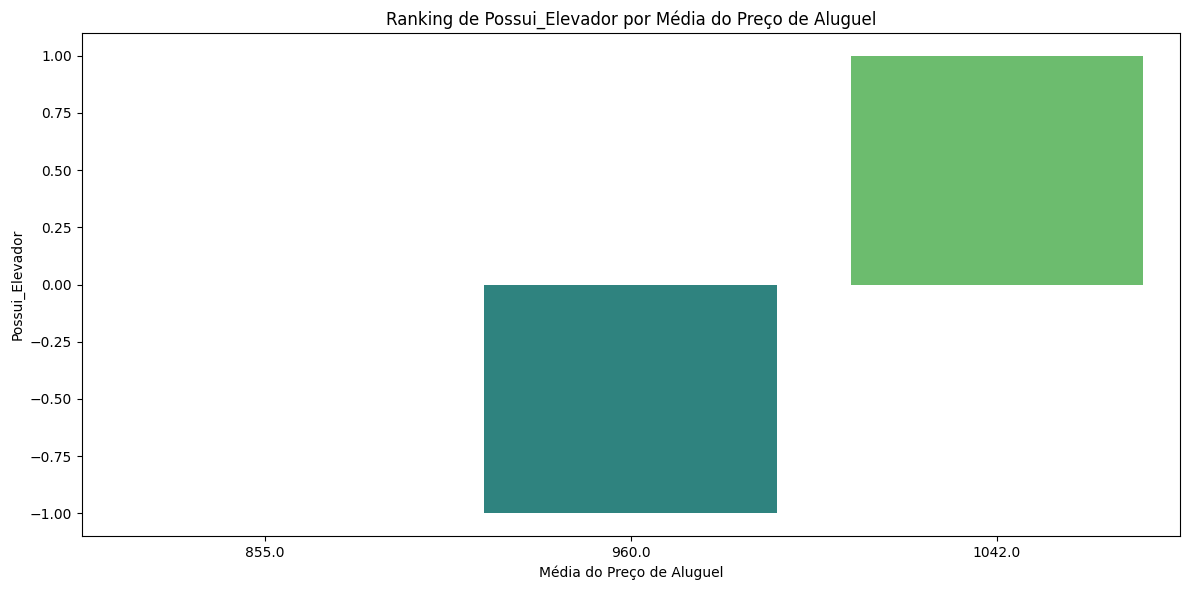

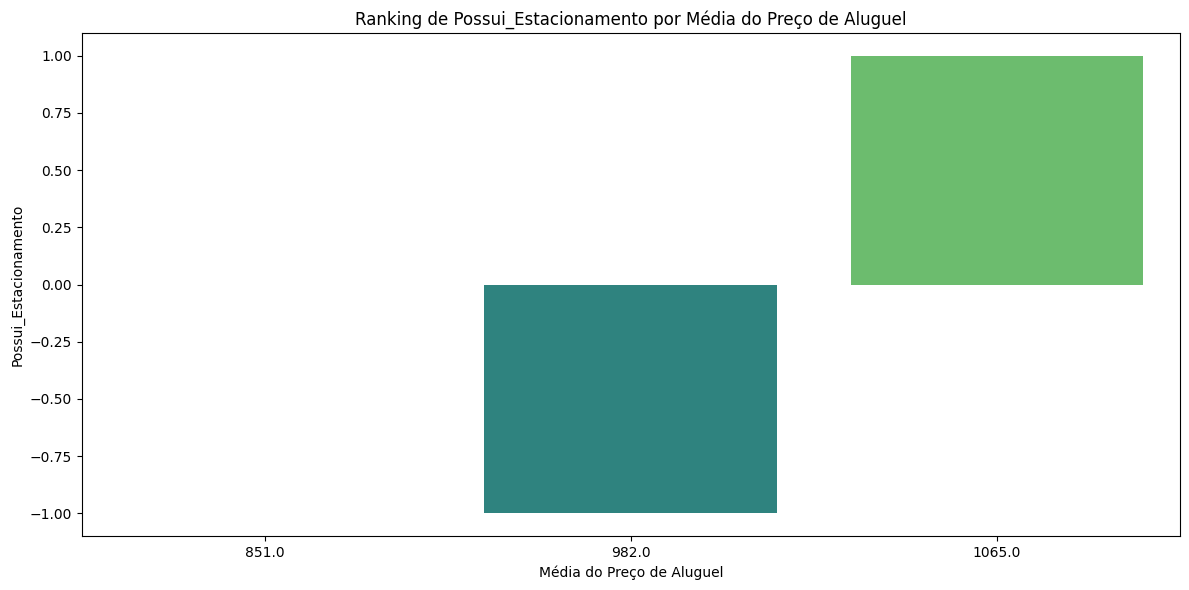

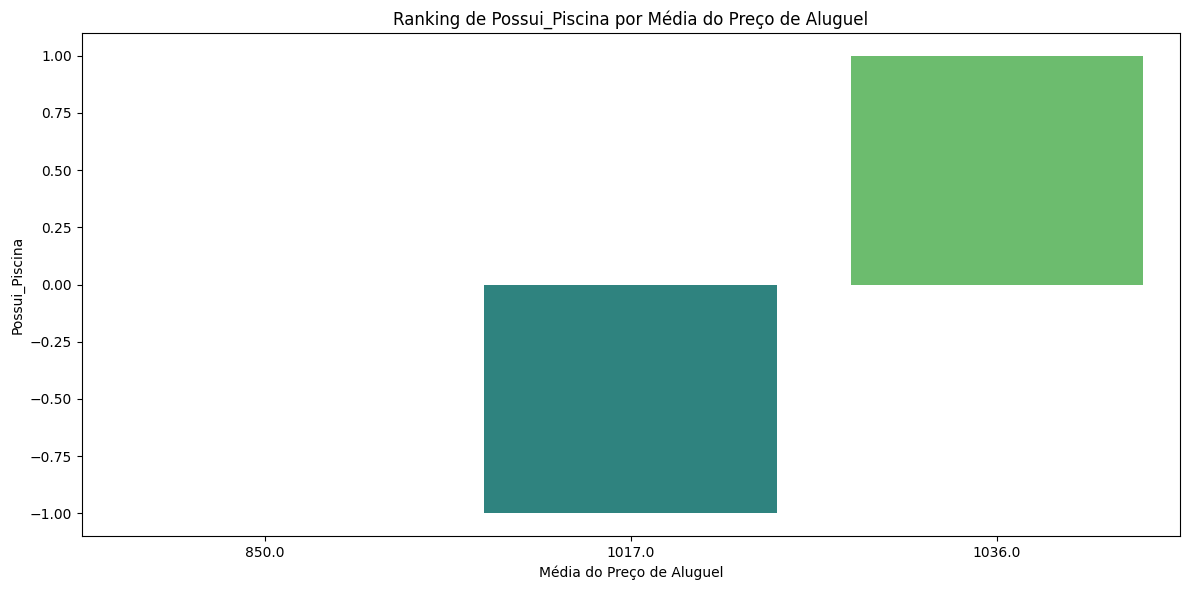

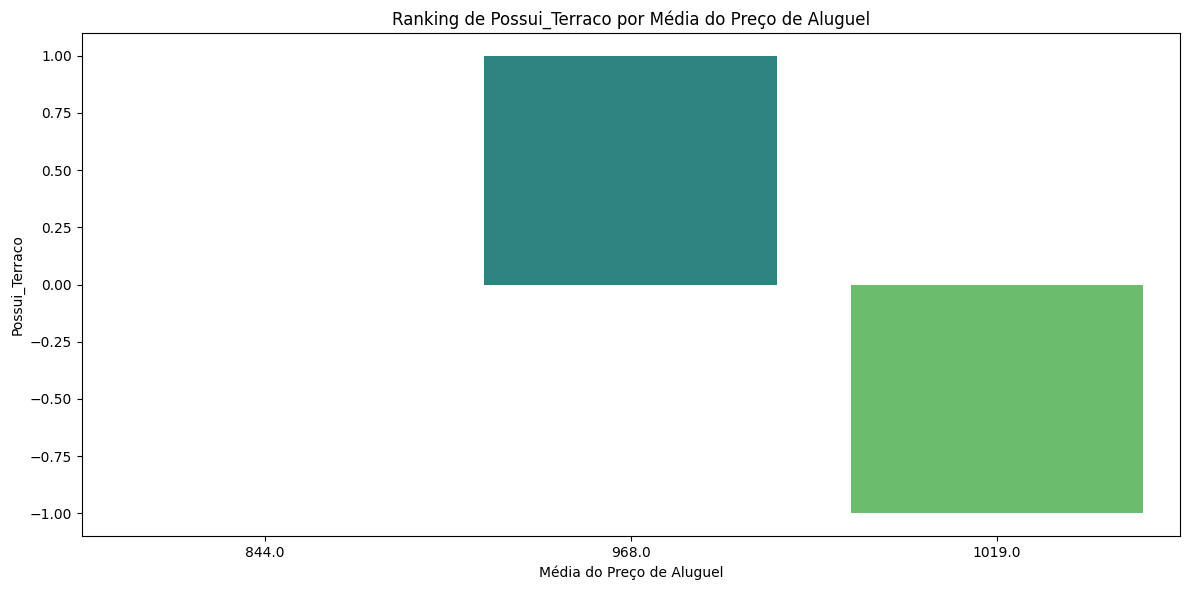

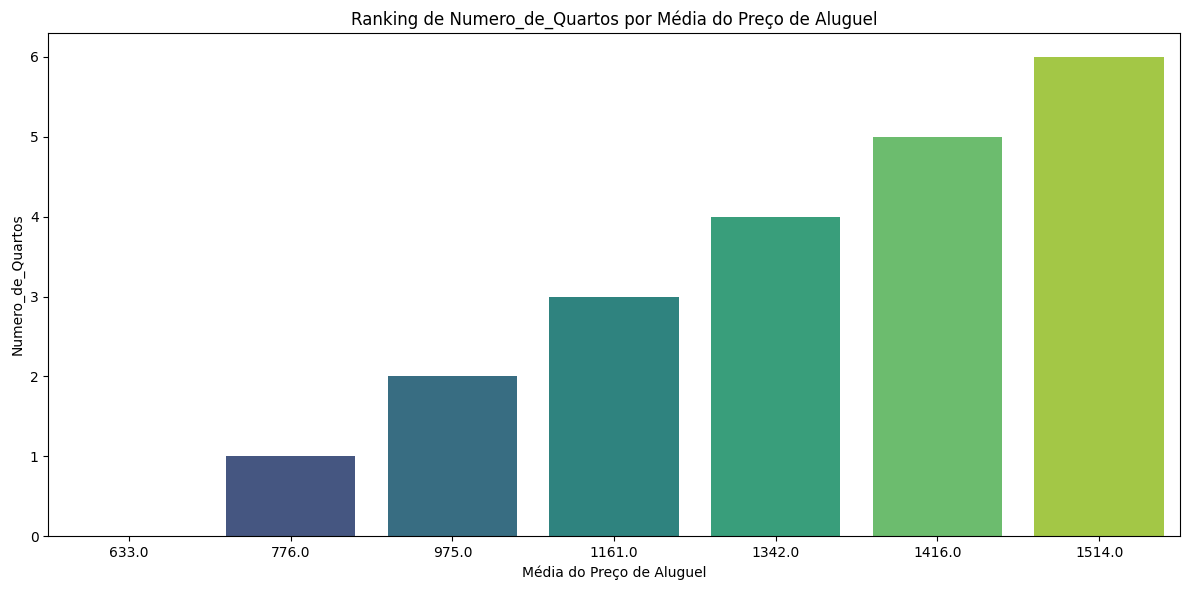

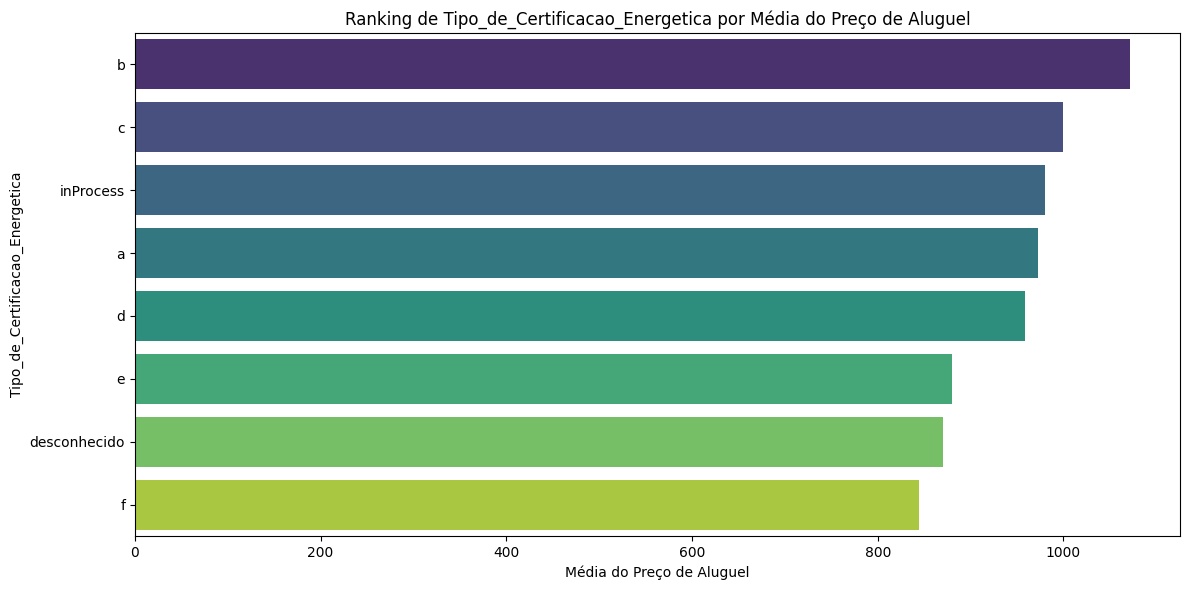

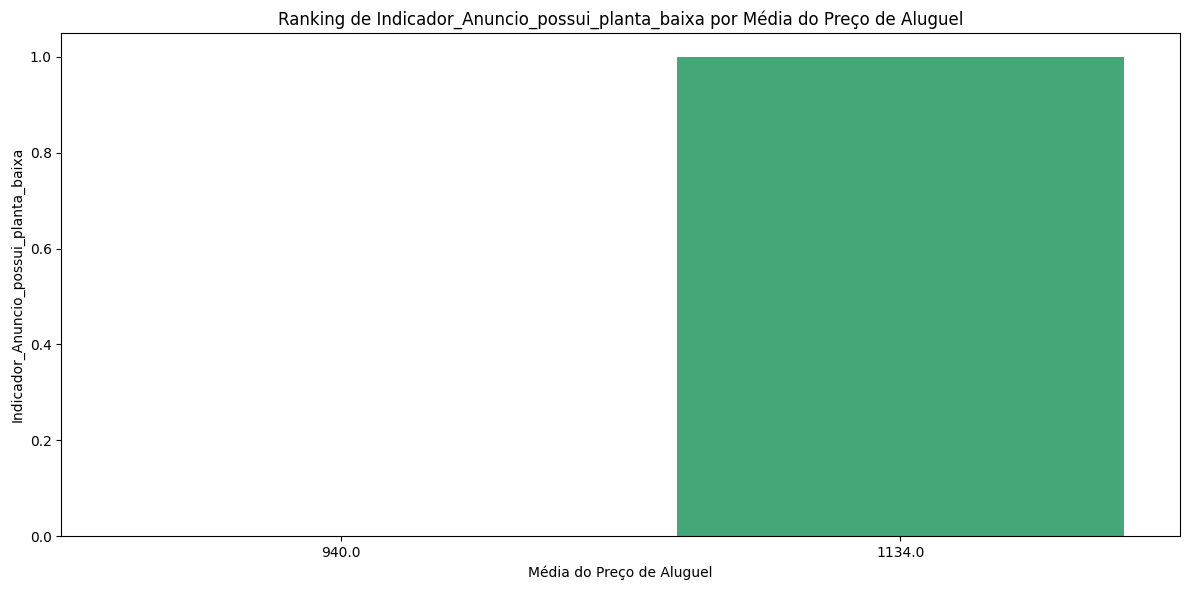

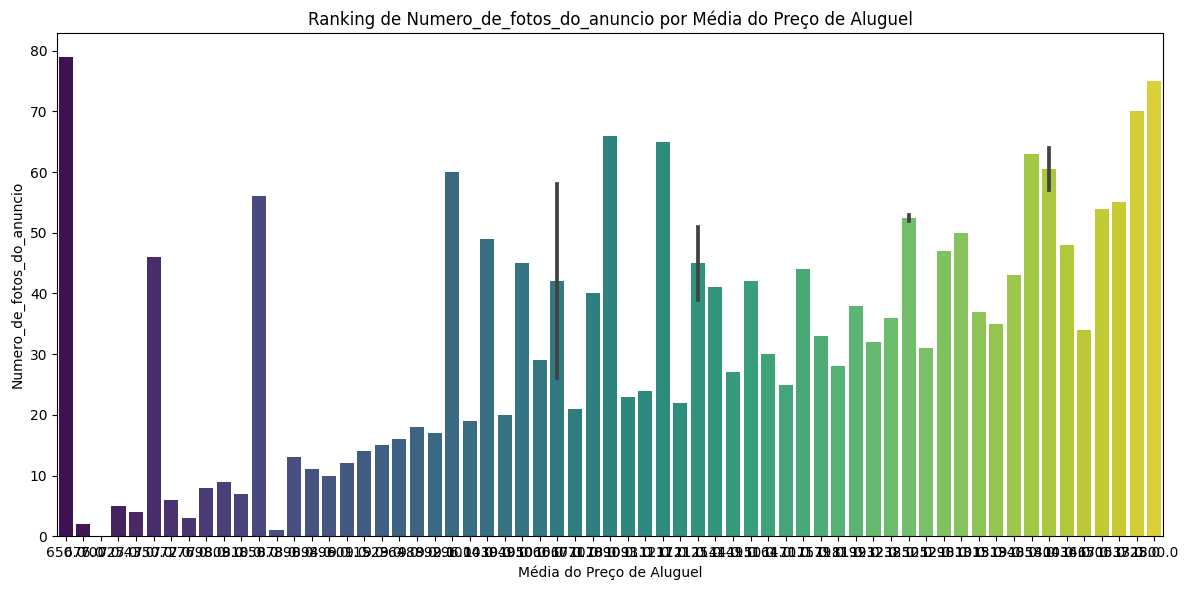

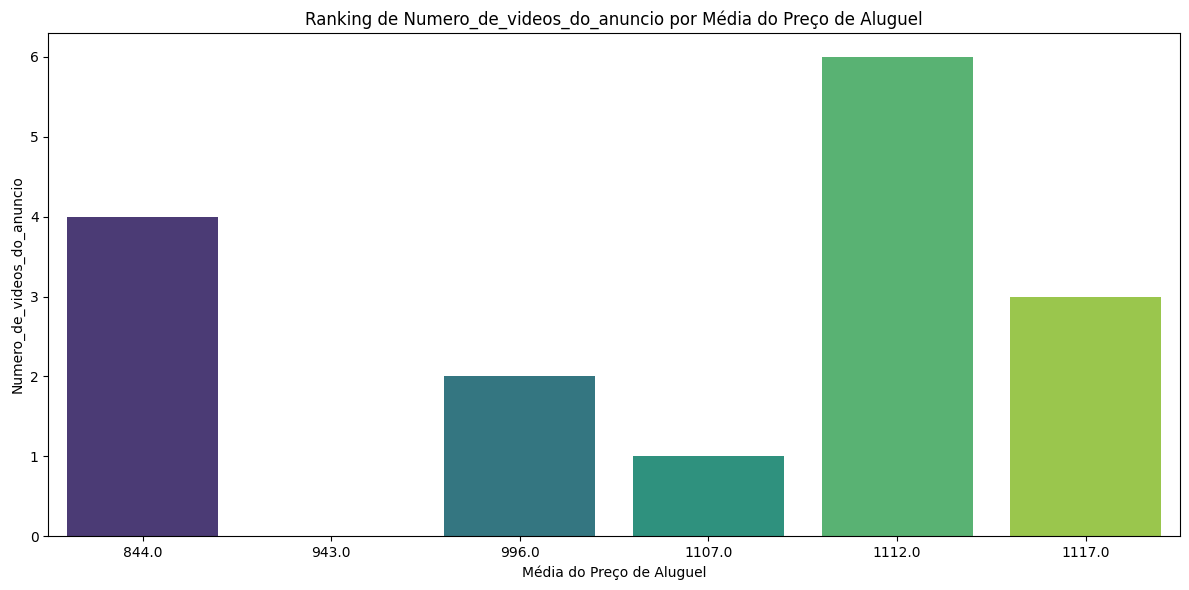

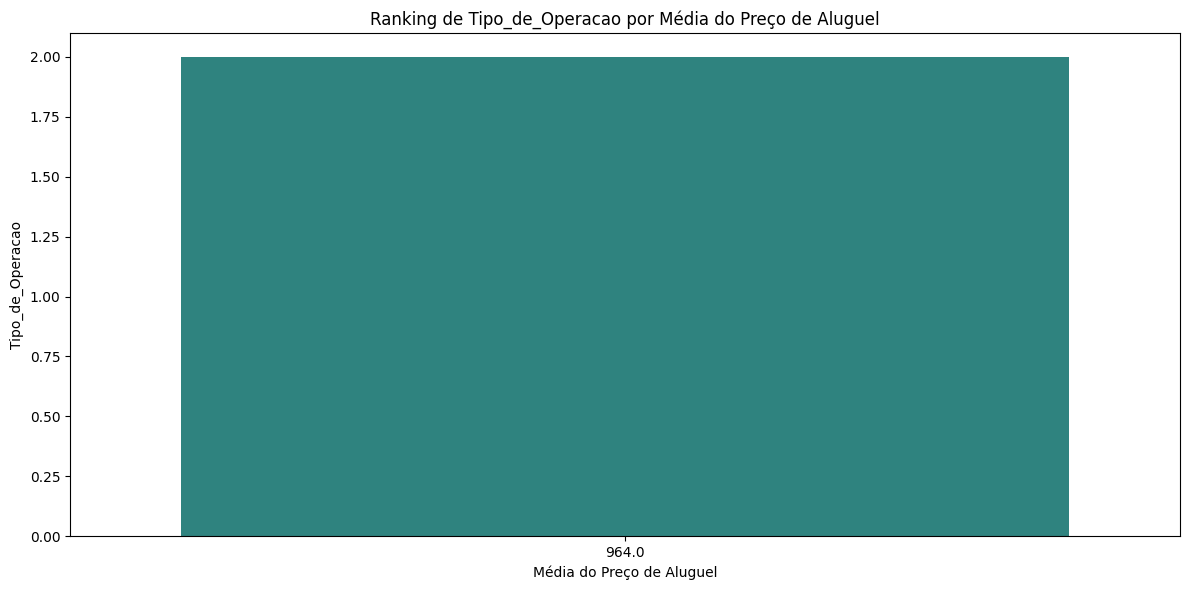

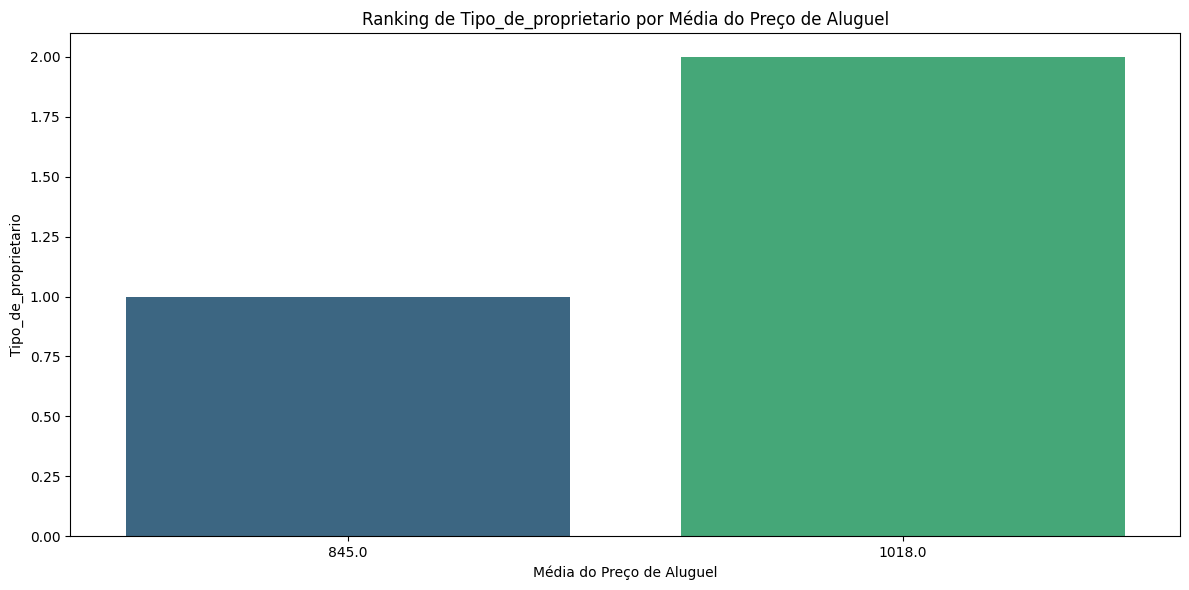

In [97]:
variables = ['Numero_Andar_do_imovel',
             'Indicador_de_Elevador',
             'Distrito_do_imovel','Tipo_de_Construcao', 'Numero_de_Banheiros',
             'Possui_Jardim', 'Possui_Elevador', 'Possui_Estacionamento',
             'Possui_Piscina', 'Possui_Terraco', 'Numero_de_Quartos',
             'Tipo_de_Certificacao_Energetica',
             'Indicador_Anuncio_possui_planta_baixa', 'Numero_de_fotos_do_anuncio',
             'Numero_de_videos_do_anuncio', 'Tipo_de_Operacao',
             'Tipo_de_proprietario']
ranking_precos(df_final,variables)

In [ ]:
path_final = 'Imoveis\\BaseFinalv2.csv'
df_final.to_csv(path_final, sep=';', quotechar='"', decimal=',', encoding='utf-8', index_label="RowId")